# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [2]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [3]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

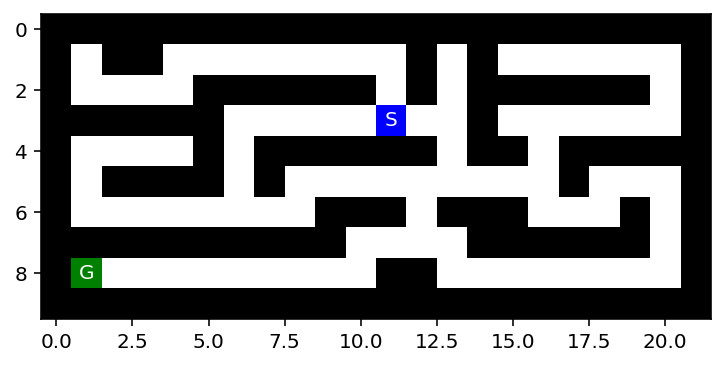

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\corey\documents\github\linearhashing\cs7320-ai\search\maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [5]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def __repr__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks
# Corey Ellis

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

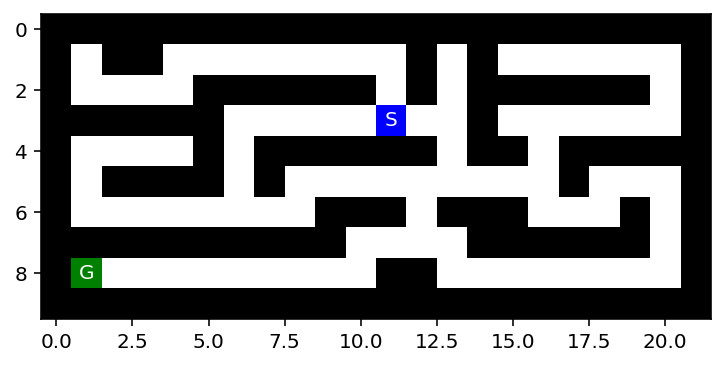

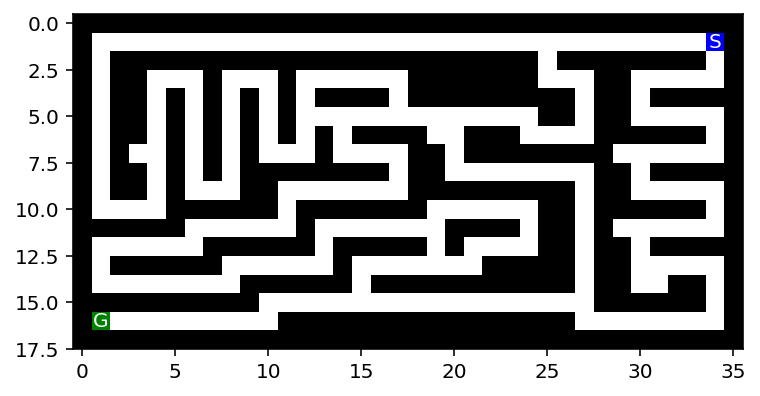

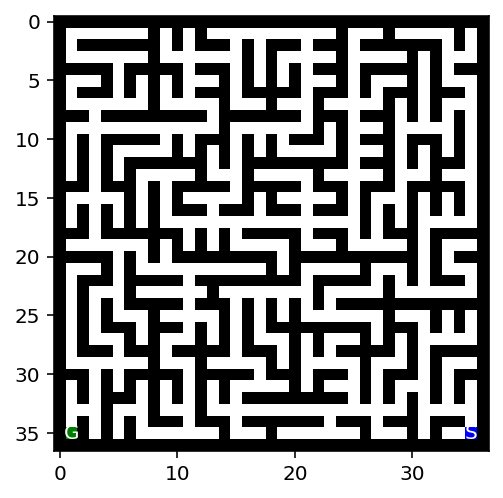

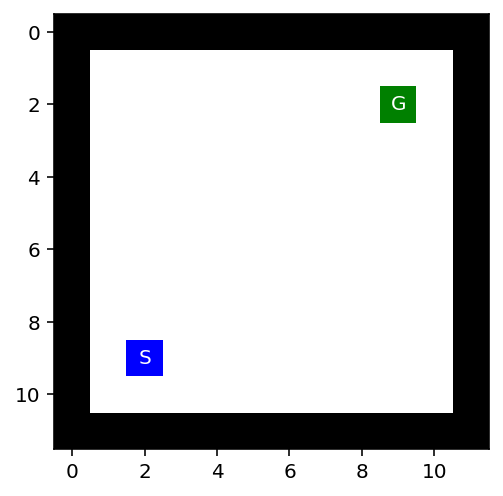

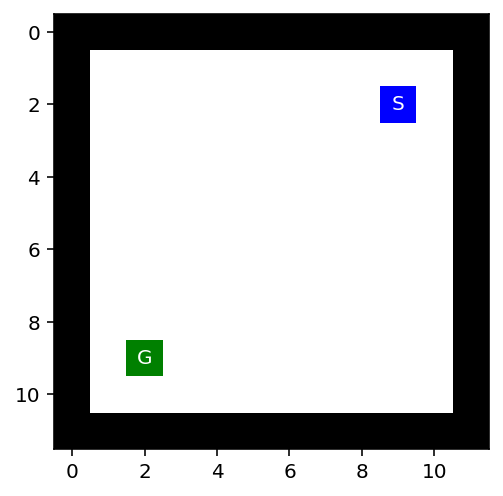

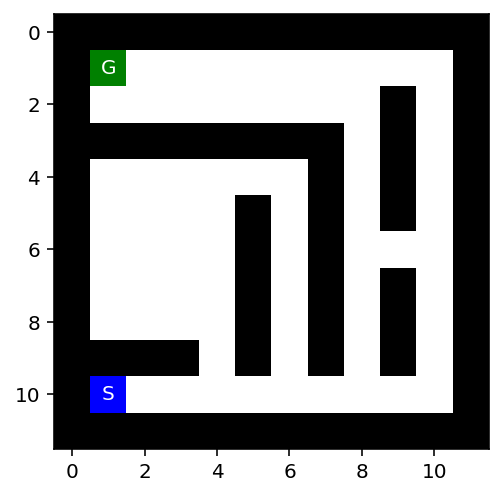

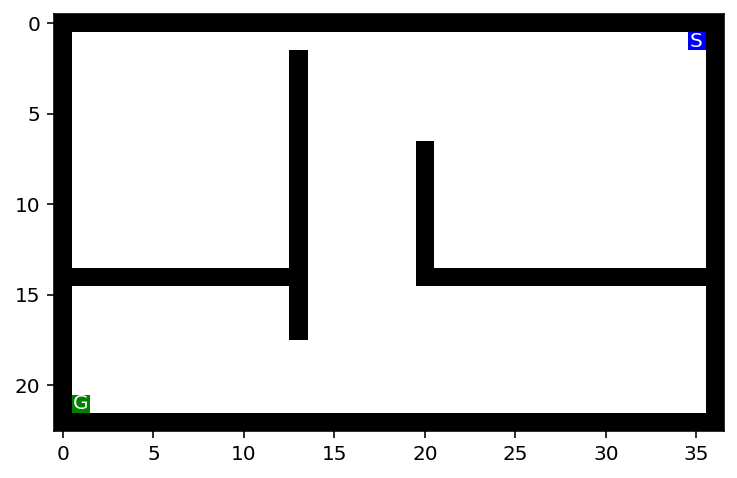

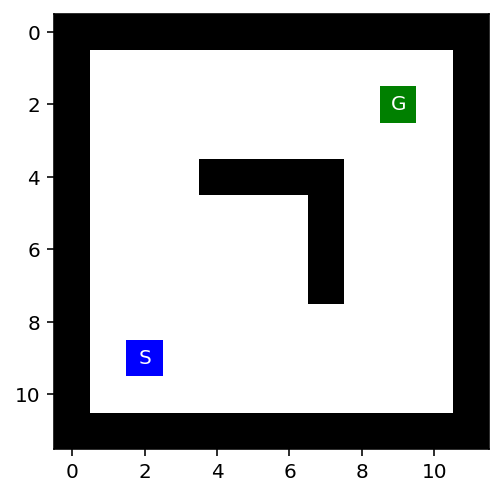

In [6]:
def loadMazes(display=False):
    mazes = {}
    f = open("small_maze.txt", "r")
    small_maze_str = f.read()
    mazes["small_maze"] = mh.parse_maze(small_maze_str)
    if display: mh.show_maze(mazes["small_maze"])
    
    f = open("medium_maze.txt", "r")
    medium_maze_str = f.read()
    mazes["medium_maze"] = mh.parse_maze(medium_maze_str)
    if display: mh.show_maze(mazes["medium_maze"])
    
    f = open("large_maze.txt", "r")
    large_maze_str = f.read()
    mazes["large_maze"] = mh.parse_maze(large_maze_str)
    if display: mh.show_maze(mazes["large_maze"])
    
    f = open("empty_maze.txt", "r")
    empty_maze_str = f.read()
    mazes["empty_maze"] = mh.parse_maze(empty_maze_str)
    if display: mh.show_maze(mazes["empty_maze"])
    
    f = open("empty_2_maze.txt", "r")
    empty_2_maze_str = f.read()
    mazes["empty_2_maze"] = mh.parse_maze(empty_2_maze_str)
    if display: mh.show_maze(mazes["empty_2_maze"])
    
    f = open("loops_maze.txt", "r")
    loops_maze_str = f.read()
    mazes["loops_maze"] = mh.parse_maze(loops_maze_str)
    if display: mh.show_maze(mazes["loops_maze"])
   
    f = open("open_maze.txt", "r")
    open_maze_str = f.read()
    mazes["open_maze"] = mh.parse_maze(open_maze_str)
    if display: mh.show_maze(mazes["open_maze"])

    f = open("wall_maze.txt", "r")
    wall_maze_str = f.read()
    mazes["wall_maze"] = mh.parse_maze(wall_maze_str)
    if display: mh.show_maze(mazes["wall_maze"])
    
    return mazes

loadMazes(display=True)
print()

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

# Task1- Answer Pt. 1

* Initial State: The state is the starting position of the node. This is the first loaction of the root node listed as 'S' in the maze.
* Actions: The directions that can be moved within the maze North, South, East, West
* Transition: The algorithm used to search through the maze will determine the action chosen. These algorithms are Depth First Search, Breadth First Search, A* Search, and Greedy Best First Search
* Goal State: Reaching the goal 'G' in the maze at the end of the maze
* Path Cost: the total number of steps taken to reach the goal from the start

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

# Task1- Answer Pt. 2
* n: The state space size is the total number of spaces in the maze since each posiion is a new state. The state space size is the length of the border of the maze multiplied by the width of the maze. (for an $x$ by $y$ maze, the total state space is $x*y$)
* d: The depth of the optimal solution is the minimum number of steps required to reach the goal from the initial state. In order to get this, the number of steps taken must be kept track of in order to see how many moves it takes to reach the goal. 
* m: This is the longest path in the tree. For the nodes in the maze, the longest chain of nodes together that a path exists would be the maximum depth of the tree. To find this, we would need to go in every direction from a node and continue for all combinations for which a path exisits in any direction and chose whichever has the longest chain of moves here the location does not repeat. For any given maze, maximum this value could be is the length or width of the maze minus two (to account for the outer walls of the maze) depending on which is longer. This is because worst case is the maze is empty then, the chain would go from wall to another if the start is also along a wall.
* b: The maximum branching factor is the number of successor nodes from a given parent node. In other words the number of adjacent nodes that are not blocked at a given location would be the number of brnaching paths that can be taken. The maximum branching factor is 4 for any maze because the best case is all four directions are available.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
def printMaze(maze):
    for x in maze:
        str = ''
        for y in x:
            str+= y
        print(str)
        
def colorMaze(maze,reached,frontier, node):
    for r in reached:
        if(maze[r[0]][r[1]] != 'S' and maze[r[0]][r[1]] != 'G'):
            maze[r[0]][r[1]] = '.'
    for f in frontier:
        if(maze[f.pos[0]][f.pos[1]] != 'S' and maze[f.pos[0]][f.pos[1]] != 'G'):
            maze[f.pos[0]][f.pos[1]] = 'F'
    while node.parent != None:
        if maze[node.pos[0]][node.pos[1]] != 'S' and maze[node.pos[0]][node.pos[1]] != 'G':
            maze[node.pos[0]][node.pos[1]] = 'P'
        node = node.parent
    mh.show_maze(maze)

def squaresExplored(maze, pos):
    if(maze[pos[0]][pos[1]] != 'S' and maze[pos[0]][pos[1]] != 'G'):
        maze[pos[0]][pos[1]] = '.'
            

In [8]:
def expand(maze, node):
    exp = []
    if (maze[node.pos[0]][node.pos[1]+1] != 'X'):
        exp.append(Node(pos=(node.pos[0],node.pos[1]+1), parent = node, action='e', cost=node.cost+1))
    if (maze[node.pos[0]][node.pos[1]-1] != 'X'):
        exp.append(Node(pos=(node.pos[0],node.pos[1]-1), parent = node, action='w', cost=node.cost+1))
    if (maze[node.pos[0]-1][node.pos[1]] != 'X'):
        exp.append(Node(pos=(node.pos[0]-1,node.pos[1]), parent = node, action='n', cost=node.cost+1))
    if (maze[node.pos[0]+1][node.pos[1]] != 'X'):
        exp.append(Node(pos=(node.pos[0]+1,node.pos[1]), parent = node, action='s', cost=node.cost+1))
    return exp

In [9]:
def BFS(maze, verbose = False, multipleGs = False, paint = True):
    if multipleGs:
        goal_pos = findGoals(maze)
    else:
        goal_pos = mh.find_pos(maze, what = "G")
        
    start_pos = mh.find_pos(maze, what = "S")
    root = Node(pos = start_pos, parent = None, action = None, cost = 0)
    
    # print when verbose
    if verbose:
        print(f"Start: {start_pos}")
        print(f"Goal: {goal_pos}")
    
    # check to see if the root is the goal
    if multipleGs:
        if root.pos in goal_pos:
            return root, 0, 1,1,1,1
    else:
        if root.pos == goal_pos:
            return root, 0, 1,1,1,1
    
    # otherwise do function
    # initialize variables
    frontier = []
    frontier.append(root)
    reached = {}
    reached[root.pos] = root
    iteration = 0
    tree_size = 1
    frontier_size = len(frontier)
    max_depth = 0
    
    
    #if verbose:
    #    print(f"Frontier: {len(frontier)}")
    
    # loop to search
    while len(frontier) != 0:
        
        if frontier_size < len(frontier):
            frontier_size = len(frontier)
        
        # get first element inserted
        node = frontier.pop(0)
        if node.cost > max_depth:
            max_depth = node.cost
    
        # if at the goal
        if multipleGs:
            if node.pos in goal_pos:
                if paint:
                    colorMaze(maze, reached, frontier, node)
                return node, node.cost, iteration, max_depth, tree_size,frontier_size
        else:
            if node.pos == goal_pos:
                if paint:
                    colorMaze(maze, reached, frontier, node)
                return node, node.cost, iteration, max_depth, tree_size,frontier_size
    
    
        
        if verbose:
            print(f"Interation #{iteration}: {node.__str__()}")
        
        #expand node
        exp = expand(maze, node)
        if verbose:
            print(f"List Expansion: {len(exp)}")
        
        for child in exp:
            c = child.pos
            if (c not in reached):
                reached[c] = child
                #if verbose:
                    #print(f"adding {c[0]},{c[1]} to the frontier")
                    #colorMaze(maze, reached, frontier, node)
                tree_size += 1
                frontier.append(child)
        iteration = iteration + 1
        

small_maze


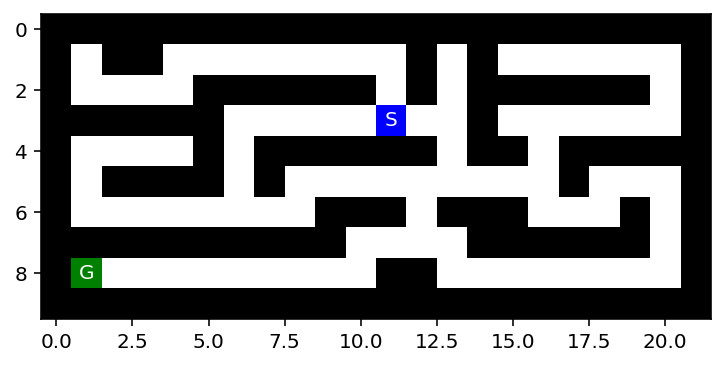

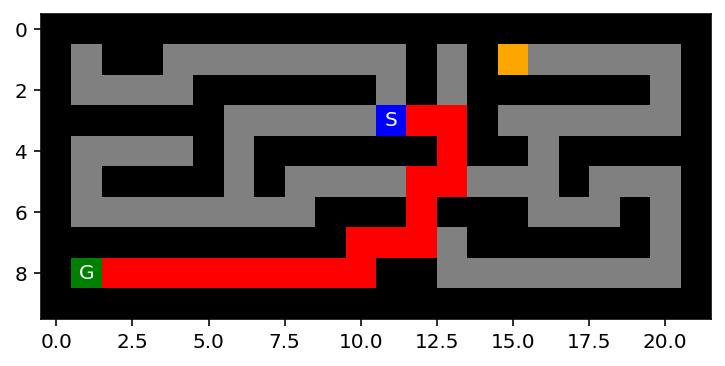

The algorithm took 92 iterations
Path cost:  19
Maximum tree depth:  19
Maximum tree nodes:  94
Maximum size of the frontier:  9
medium_maze


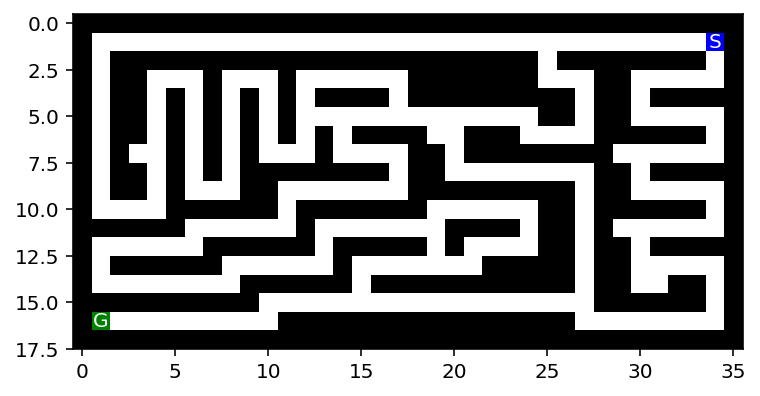

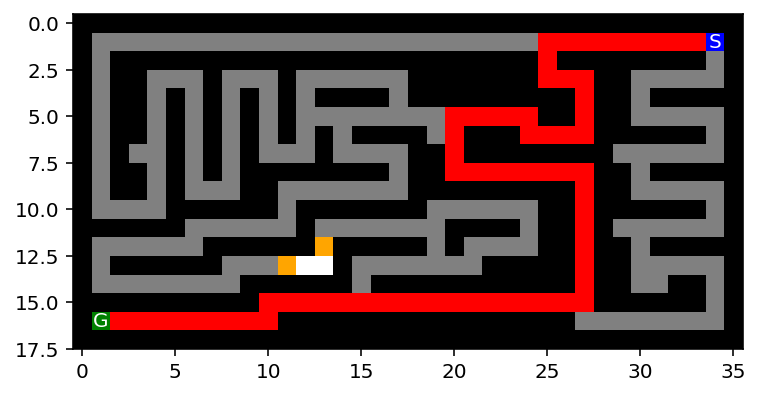

The algorithm took 269 iterations
Path cost:  68
Maximum tree depth:  68
Maximum tree nodes:  272
Maximum size of the frontier:  8
large_maze


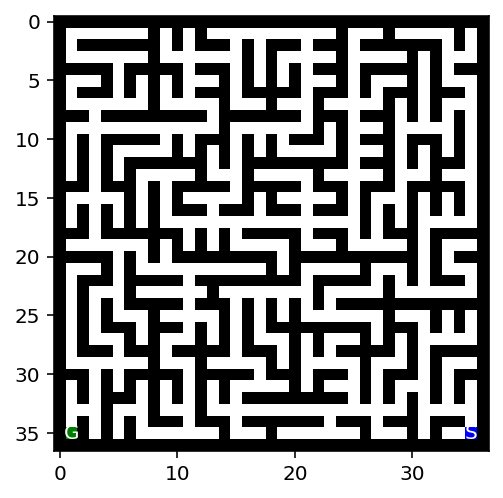

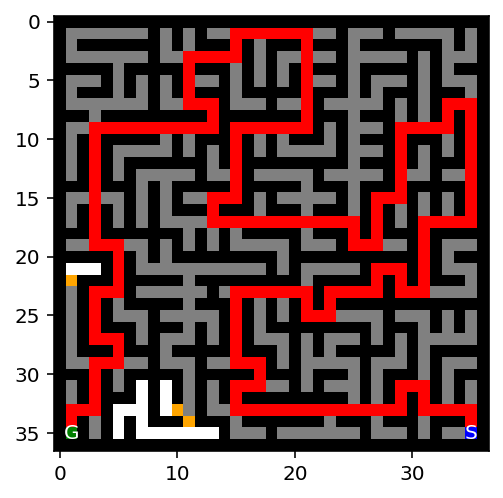

The algorithm took 622 iterations
Path cost:  210
Maximum tree depth:  210
Maximum tree nodes:  626
Maximum size of the frontier:  8
empty_maze


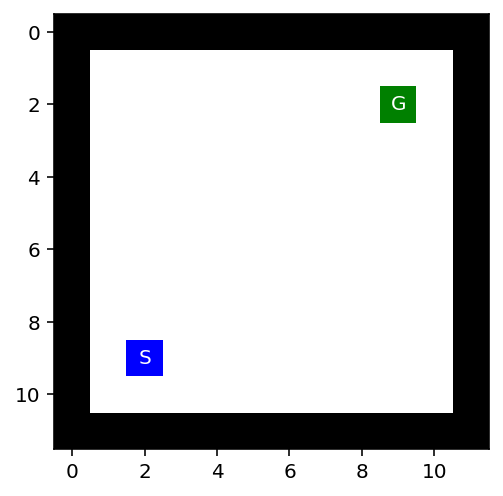

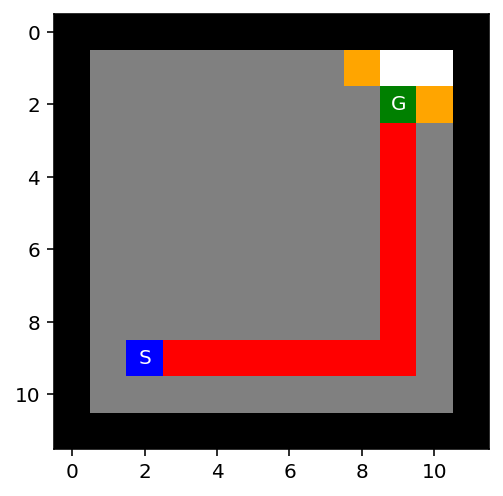

The algorithm took 95 iterations
Path cost:  14
Maximum tree depth:  14
Maximum tree nodes:  98
Maximum size of the frontier:  12
empty_2_maze


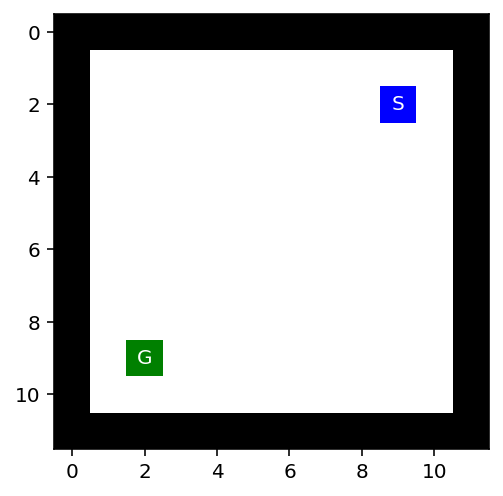

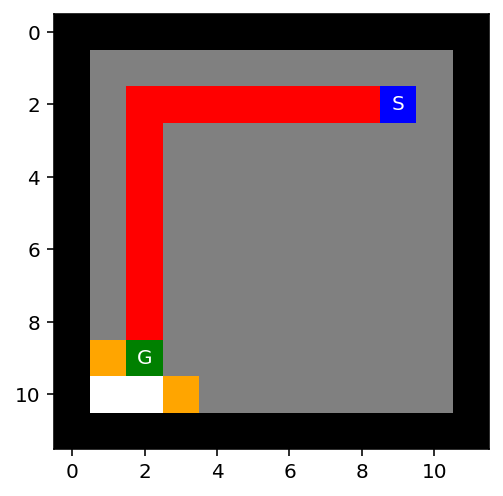

The algorithm took 95 iterations
Path cost:  14
Maximum tree depth:  14
Maximum tree nodes:  98
Maximum size of the frontier:  12
loops_maze


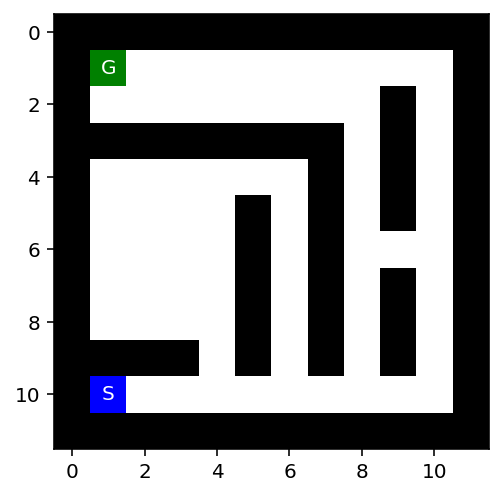

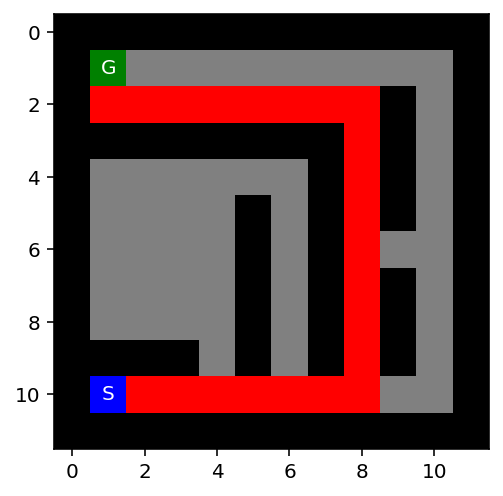

The algorithm took 71 iterations
Path cost:  23
Maximum tree depth:  23
Maximum tree nodes:  72
Maximum size of the frontier:  7
open_maze


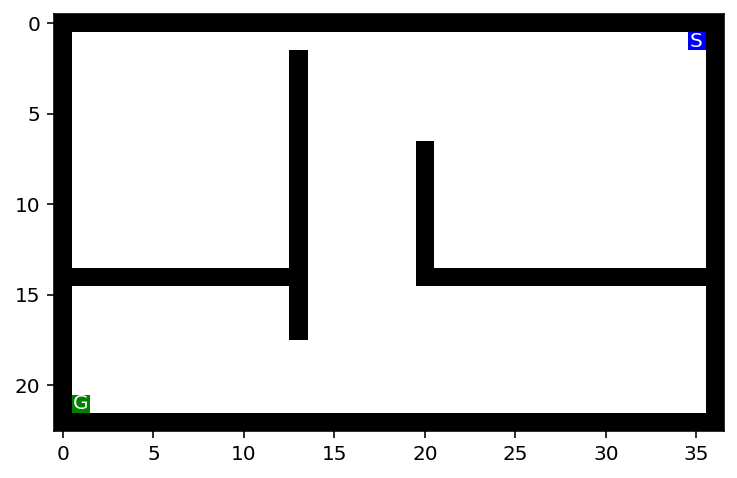

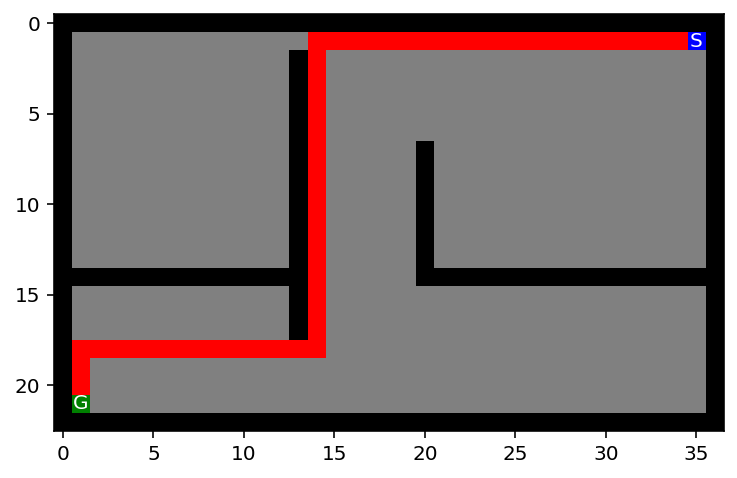

The algorithm took 683 iterations
Path cost:  54
Maximum tree depth:  54
Maximum tree nodes:  684
Maximum size of the frontier:  23
wall_maze


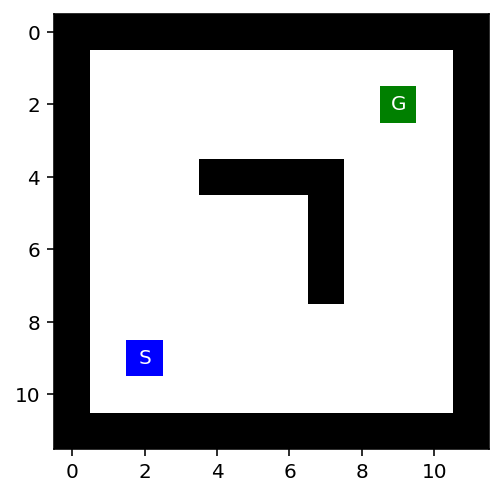

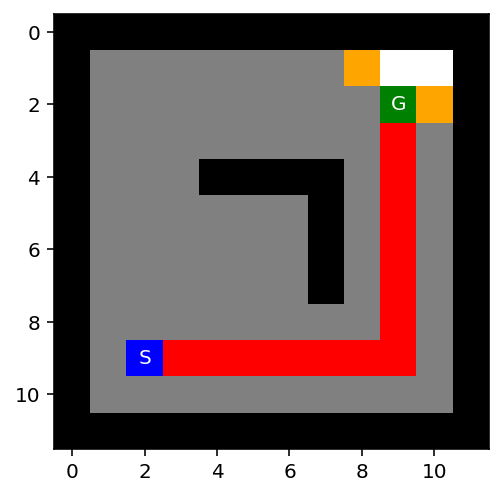

The algorithm took 88 iterations
Path cost:  14
Maximum tree depth:  14
Maximum tree nodes:  91
Maximum size of the frontier:  11


In [76]:
mazes = loadMazes(display=False)
import time
BFSTimes = []
BFSCost = []
BFSne = []
BFSmtd = []
BFSmtn = []
BFSmfs = []
for m in mazes:
    print(m)
    mh.show_maze(mazes[m])
    start = time.time()
    node, path_cost, node_expanded, max_tree_depth, max_tree_nodes,max_frontier_size = BFS(mazes[m], verbose=False)
    stop = time.time()
    BFSTimes.append(stop - start)
    BFSCost.append(path_cost)
    BFSne.append(node_expanded)
    BFSmtd.append(max_tree_depth)
    BFSmtn.append(max_tree_nodes)
    BFSmfs.append(max_frontier_size)
    print(f"The algorithm took {node_expanded} iterations")
    print("Path cost: ", path_cost)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum tree nodes: ", max_tree_nodes)
    print("Maximum size of the frontier: ", max_frontier_size)

In [10]:
# Check Cycles
def is_cyclic(node, next=None):
    parent = node.parent
    while parent != None:
        if parent.pos == node.pos:
            return True
        parent = parent.parent
    return False

def showPath(maze, node):
    while node is not None:
        if maze[node.pos[0]][node.pos[1]] != 'G' and maze[node.pos[0]][node.pos[1]] != 'S':
            maze[node.pos[0]][node.pos[1]] = 'P'
        for f in node.frontier:
            if maze[f.pos[0]][f.pos[1]] != 'G' and maze[f.pos[0]][f.pos[1]] !='S' and maze[f.pos[0]][f.pos[1]] != 'P':
                maze[f.pos[0]][f.pos[1]] = 'F'
        node = node.parent
    mh.show_maze(maze)
    
def resetPath(maze):
    for x in range(len(maze)):
        for y in range(len(maze[0])):
            if maze[x][y] == 'P':
                maze[x][y] = ' '
 

In [11]:
class DFSNode:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos) # the state; positions are (row,col)
        self.parent = parent 
        self.action = action 
        self.cost = cost # g(n) for A* search
        self.frontier = []

    def __str__(self):
        str = f"Node - pos = {self.pos}; parent = {repr(self.parent)}; action{self.action}; cost = {self.cost};"
        str = str + "frontier"
        for fron in self.frontier:
            str =f"{str} {fron.pos},"
        return str

In [12]:
# Use default random Options
import random
def add_to_fontier(node, maze, strategy='random'):
    exp = []
    if strategy == 'random':
        #add all the actions to the list
        if maze[node.pos[0]][node.pos[1] + 1] != 'X':
            exp.append(DFSNode(pos=(node.pos[0],node.pos[1] + 1), parent=node, action='e', cost=node.cost+1))
        if maze[node.pos[0]][node.pos[1] - 1] != 'X':
            exp.append(DFSNode(pos=(node.pos[0],node.pos[1] - 1), parent=node,action='w', cost=node.cost+1))
        if maze[node.pos[0] - 1][node.pos[1]] != 'X':
            exp.append(DFSNode(pos=(node.pos[0] - 1,node.pos[1]), parent=node,action='n', cost=node.cost+1))
        if maze[node.pos[0] + 1][node.pos[1]] != 'X':
            exp.append(DFSNode(pos=(node.pos[0] + 1,node.pos[1]), parent=node,action='s', cost=node.cost+1))
        random.shuffle(exp)
        
    else: # startegy = "SWEN" cardinal directions since goal is typically SW of start
        for char in strategy:
            if char == 'S':
                if maze[node.pos[0] + 1][node.pos[1]] != 'X':
                    exp.append(DFSNode(pos=(node.pos[0] + 1,node.pos[1]),parent=node, action='s', cost=node.cost+1))
            if char == 'W':
                if maze[node.pos[0]][node.pos[1] - 1] != 'X':
                    exp.append(DFSNode(pos=(node.pos[0],node.pos[1] - 1),parent=node, action='w', cost=node.cost+1))
            if char == 'E':
                if maze[node.pos[0]][node.pos[1] + 1] != 'X':
                    exp.append(DFSNode(pos=(node.pos[0],node.pos[1] + 1),parent=node, action='e', cost=node.cost+1))
            if char == 'N':
                if maze[node.pos[0] - 1][node.pos[1]] != 'X':
                    exp.append(DFSNode(pos=(node.pos[0] - 1,node.pos[1]),parent=node, action='n', cost=node.cost+1))
    
    node.frontier = exp

In [13]:
def DFS(maze, verbose, choosing_method='random', multipleGs = False, max_iterations = 10000):

    node_x_y = mh.find_pos(maze, what="S")
    node = DFSNode(pos=node_x_y, parent = None, action = None, cost = 0)
    if multipleGs:
        goal_x_y = findGoals(maze)
    else:
        goal_x_y = mh.find_pos(maze, what="G")
    
    if verbose:
        print(f"Starting state:\t{node_x_y}")
        print(f"Goal State:\t{goal_x_y}")

    # root = goal
    if multipleGs:
        if node.pos in goal_x_y:
            return node, 0, 0, 1, 1,0
    else:
        if node.pos == goal_x_y:
            return node, 0, 0, 1, 1,0

    if verbose:
        print(f"Expanding {node}")

    # add to frontier
    add_to_fontier(node, maze, choosing_method)
    
    if verbose:
        print(f"Expanded {node}")

        
    iteration = 0
    done = False
    max_depth = 1
    nodes_expanded = 1
    tree_size = 1
    max_tree_size = tree_size
    frontier_size = 1
    max_frontier_size = frontier_size

    # loop for search
    while iteration < max_iterations and done == False:
    # go up 1 level
        if len(node.frontier) == 0:
            tree_size -= 1
            parent = node.parent
            node = None
            node = parent

            if verbose:
                print(f" Reached Dead End")
        
        #expand the frontier if hit dead end
        else:
        # get node, LIFO
            node = node.frontier.pop()
            if max_depth < node.cost:
                max_depth = node.cost

            # if at goal state, return    
            if multipleGs:
                if node.pos in goal_x_y:
                    return node, node.cost, nodes_expanded, max_depth,max_tree_size, max_frontier_size
            else:
                if node.pos == goal_x_y:
                    return node, node.cost, nodes_expanded, max_depth,max_tree_size, max_frontier_size
        
            if not is_cyclic(node):
                # if no cycle than not in path
                nodes_expanded += 1
                tree_size += 1
                add_to_fontier(node, maze, choosing_method)
                frontier_size += len(node.frontier)

                if max_frontier_size < frontier_size:
                    max_frontier_size = frontier_size

                if max_tree_size < tree_size:
                    max_tree_size = tree_size

                if verbose:
                    print(f"Expanding {node}")


        iteration = iteration + 1
    return None, -1, nodes_expanded, max_tree_depth, max_tree_size,max_frontier_size

small_maze


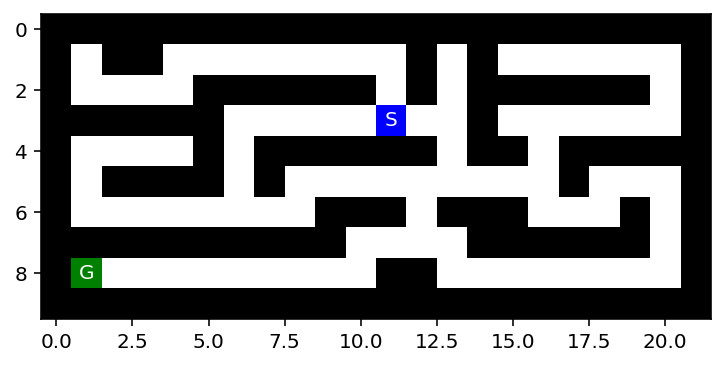

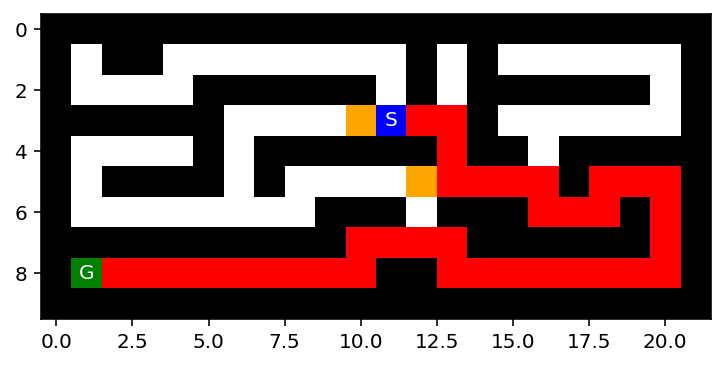

The algorithm took 88 iterations
Path cost:  37
Maximum tree depth:  45
Maximum tree nodes:  5
Maximum size of the frontier:  187
medium_maze


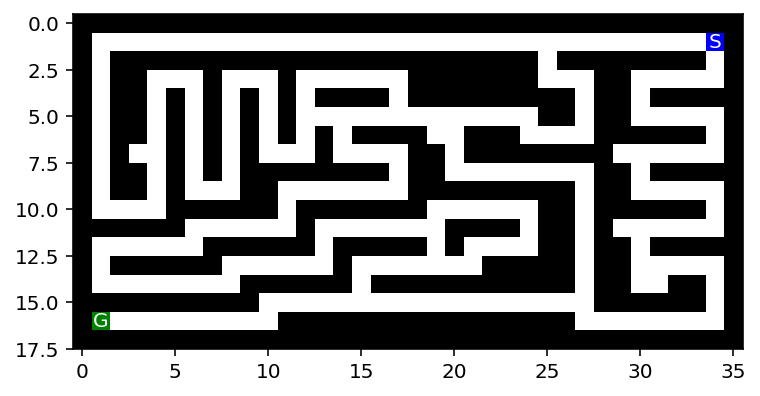

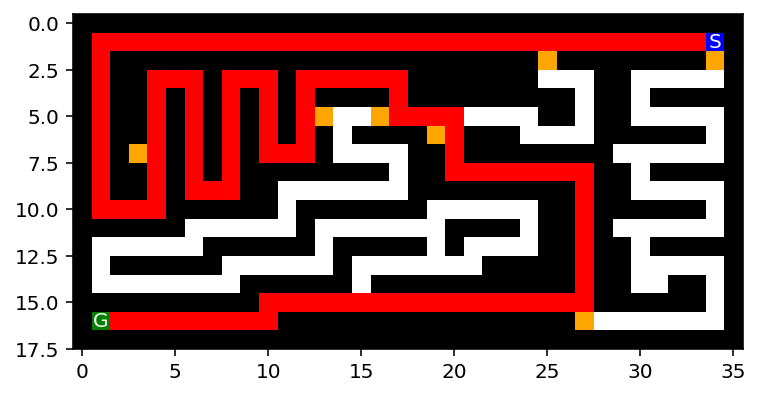

The algorithm took 88 iterations
Path cost:  134
Maximum tree depth:  191
Maximum tree nodes:  46
Maximum size of the frontier:  591
large_maze


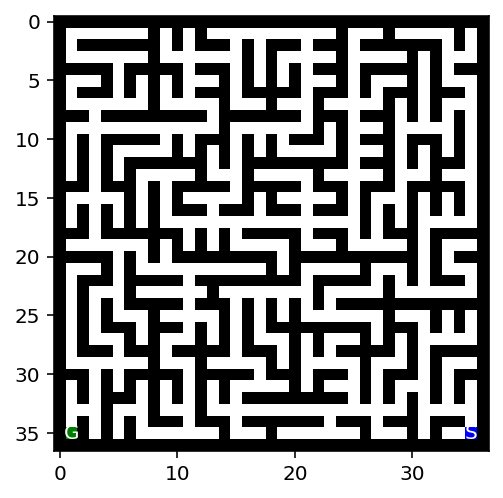

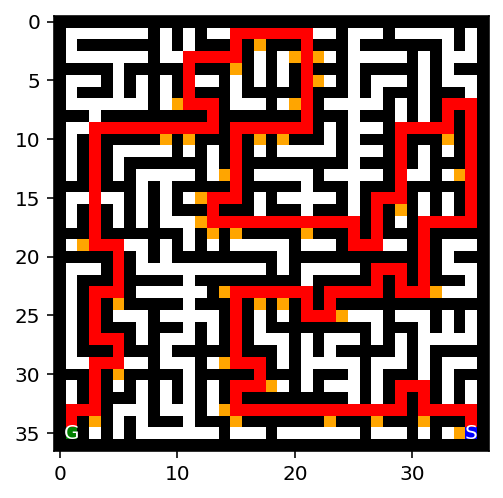

The algorithm took 88 iterations
Path cost:  210
Maximum tree depth:  223
Maximum tree nodes:  8
Maximum size of the frontier:  1013
empty_maze


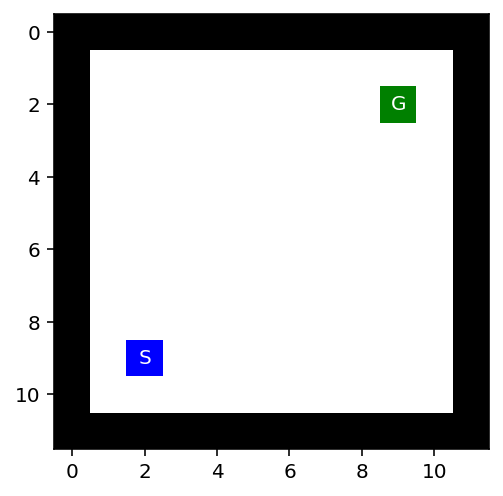

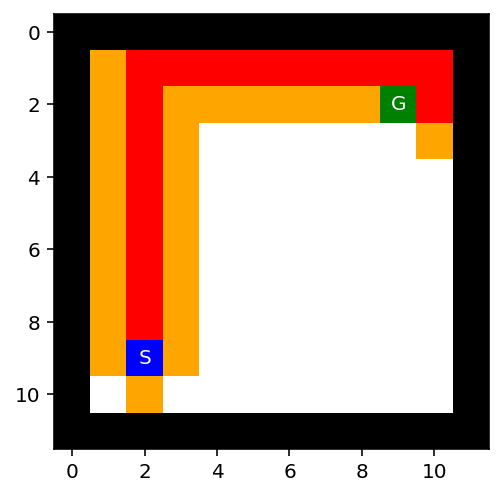

The algorithm took 88 iterations
Path cost:  18
Maximum tree depth:  18
Maximum tree nodes:  17
Maximum size of the frontier:  58
empty_2_maze


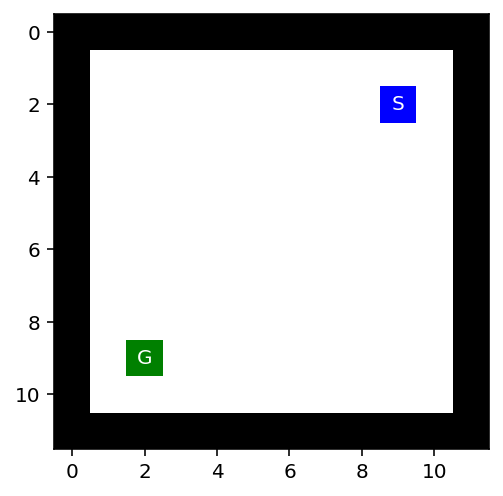

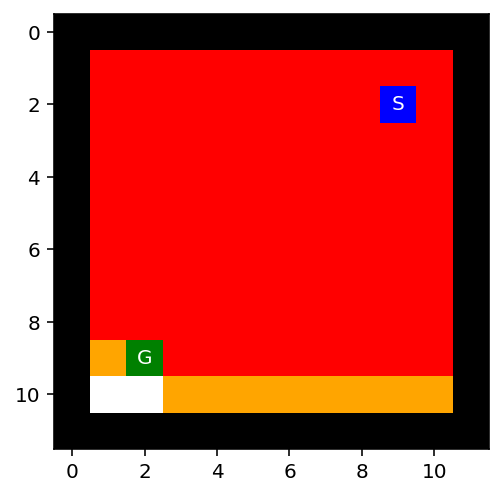

The algorithm took 88 iterations
Path cost:  88
Maximum tree depth:  88
Maximum tree nodes:  3
Maximum size of the frontier:  322
loops_maze


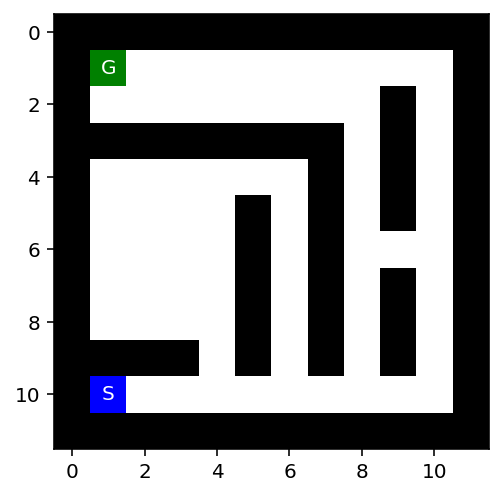

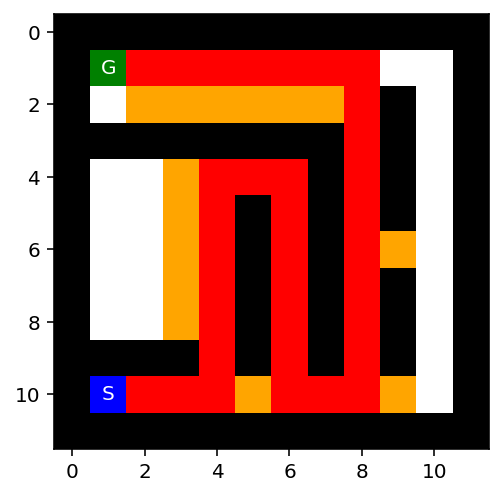

The algorithm took 88 iterations
Path cost:  35
Maximum tree depth:  41
Maximum tree nodes:  24
Maximum size of the frontier:  113
open_maze


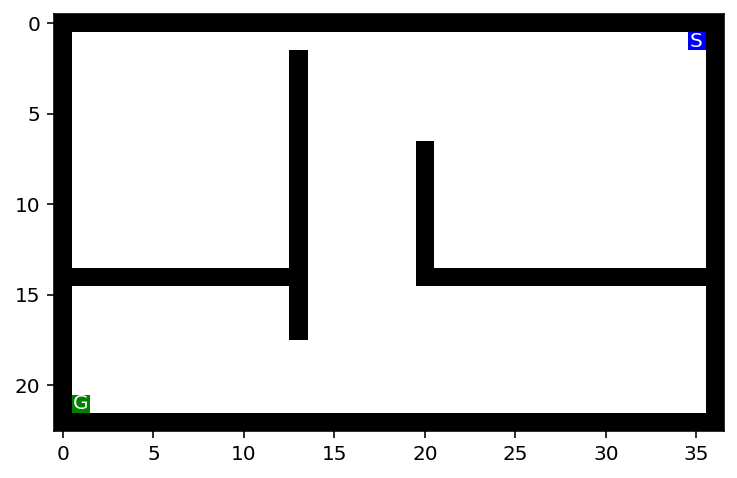

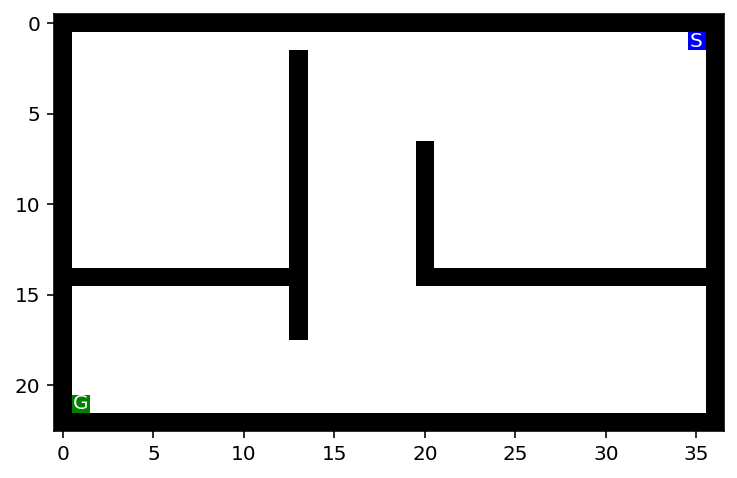

The algorithm took 88 iterations
Path cost:  -1
Maximum tree depth:  41
Maximum tree nodes:  2
Maximum size of the frontier:  5295
wall_maze


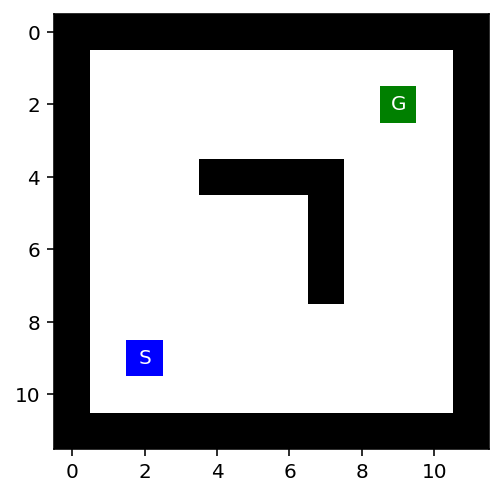

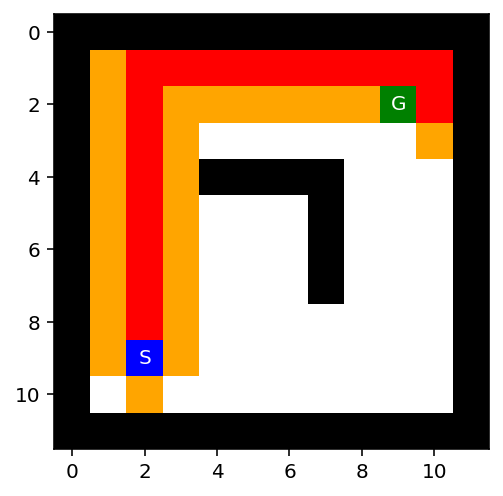

The algorithm took 88 iterations
Path cost:  18
Maximum tree depth:  18
Maximum tree nodes:  17
Maximum size of the frontier:  58


In [100]:
mazes = loadMazes(display=False)
DFSTimes = []
DFSCost = []
DFSne = []
DFSmtd = []
DFSmtn = []
DFSmfs = []
for m in mazes:
    print(m)
    mh.show_maze(mazes[m])
    start = time.time()
    node, path_cost, nodes_expanded, max_tree_depth, max_tree_nodes,max_frontier_size = DFS(mazes[m],verbose=False,choosing_method='SWEN')
    stop = time.time()
    DFSTimes.append(stop-start)
    showPath(mazes[m], node)
    DFSCost.append(path_cost)
    DFSne.append(nodes_expanded)
    DFSmtd.append(max_tree_depth)
    DFSmtn.append(max_tree_nodes)
    DFSmfs.append(max_frontier_size)
    print(f"The algorithm took {node_expanded} iterations")
    print("Path cost: ", path_cost)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum tree nodes: ", max_tree_nodes)
    print("Maximum size of the frontier: ", max_frontier_size)

small_maze


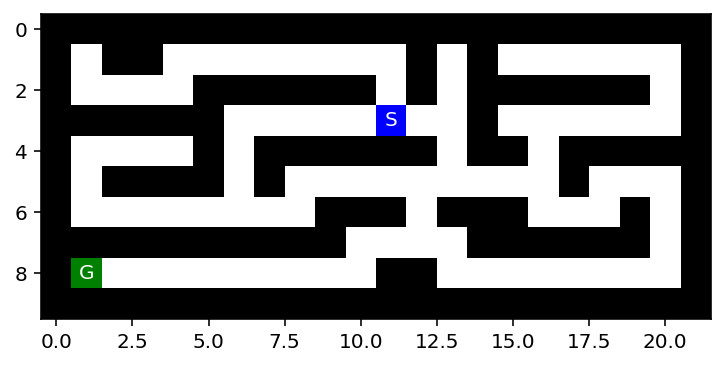

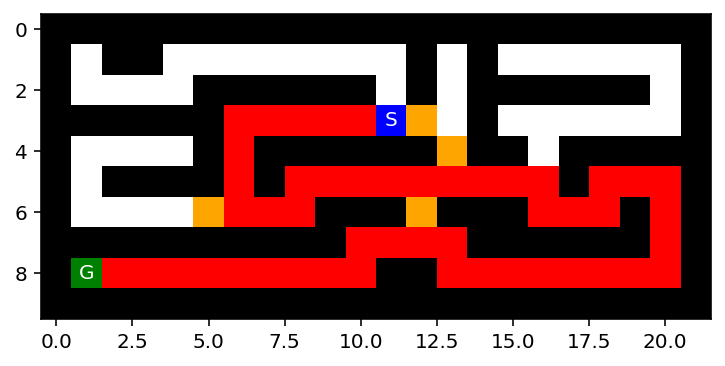

The algorithm took 88 iterations
Path cost:  49
Maximum tree depth:  49
Maximum tree nodes:  8
Maximum size of the frontier:  158
medium_maze


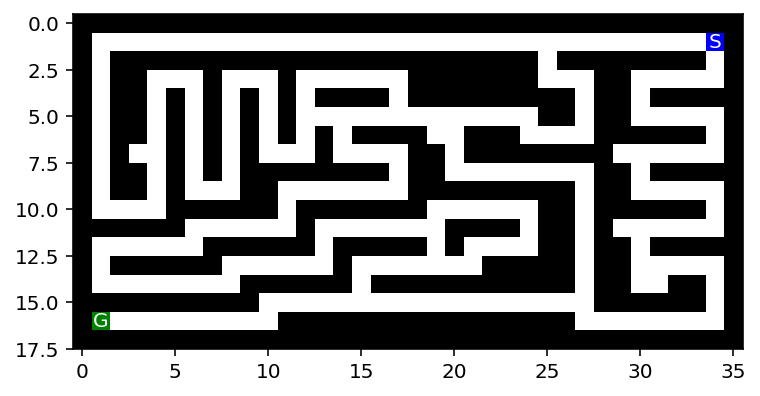

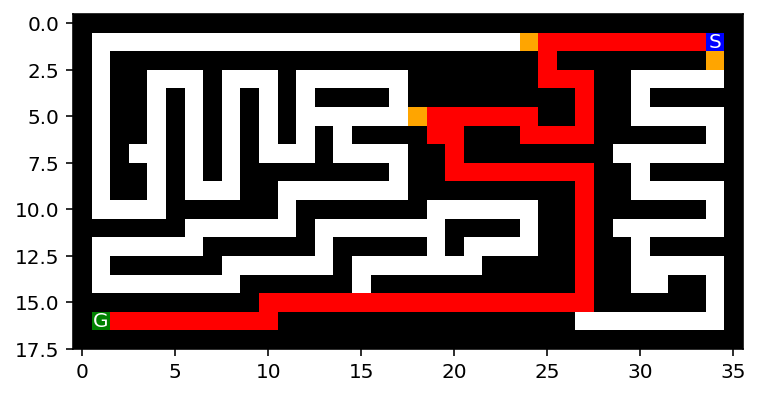

The algorithm took 88 iterations
Path cost:  70
Maximum tree depth:  205
Maximum tree nodes:  41
Maximum size of the frontier:  1265
large_maze


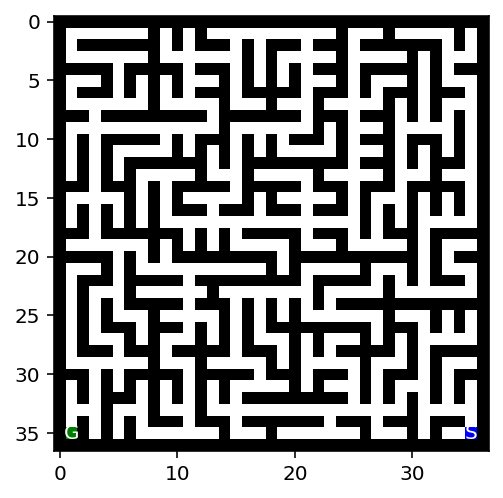

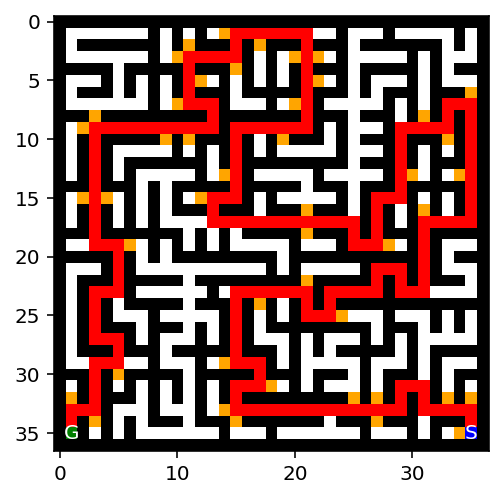

The algorithm took 88 iterations
Path cost:  210
Maximum tree depth:  215
Maximum tree nodes:  22
Maximum size of the frontier:  746
empty_maze


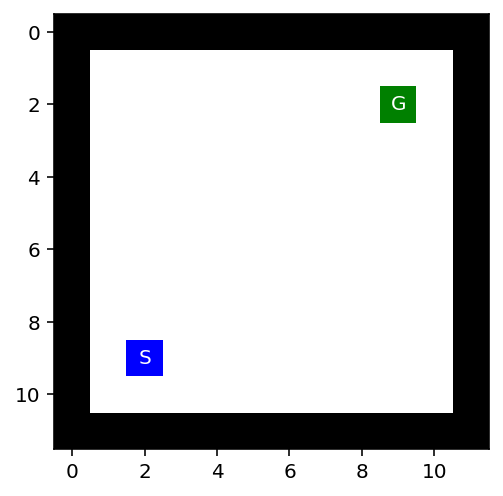

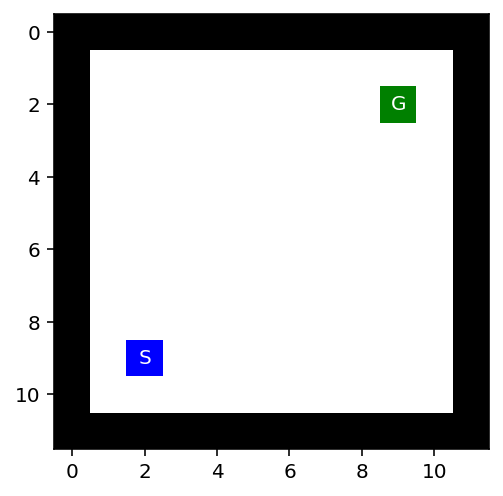

The algorithm took 88 iterations
Path cost:  -1
Maximum tree depth:  215
Maximum tree nodes:  31
Maximum size of the frontier:  5168
empty_2_maze


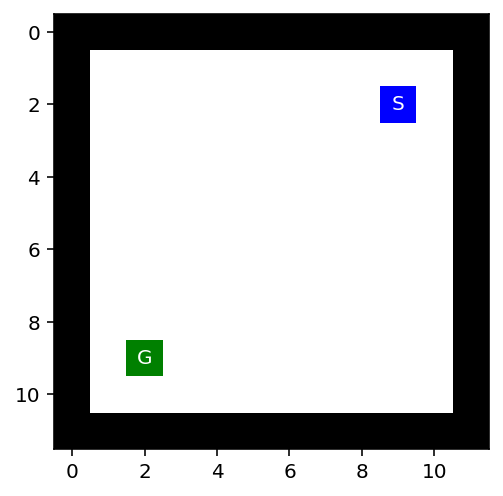

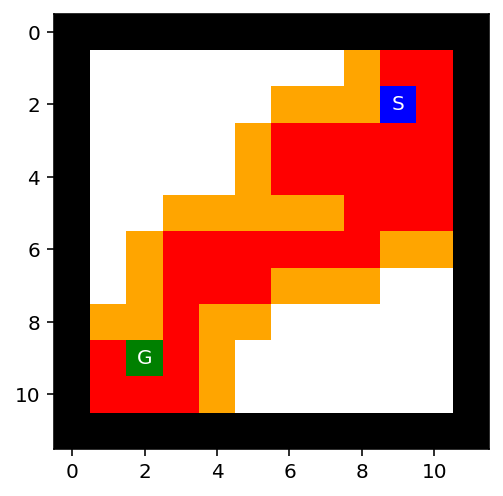

The algorithm took 88 iterations
Path cost:  32
Maximum tree depth:  32
Maximum tree nodes:  24
Maximum size of the frontier:  113
loops_maze


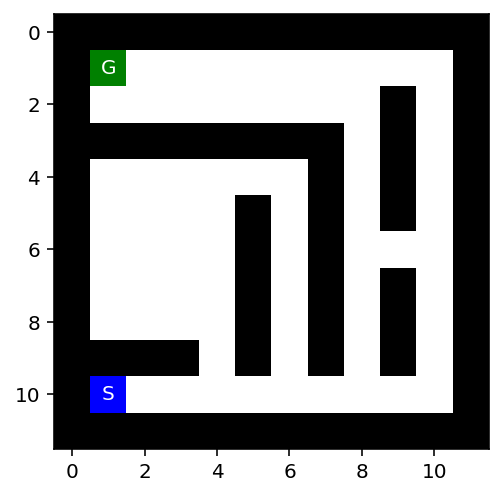

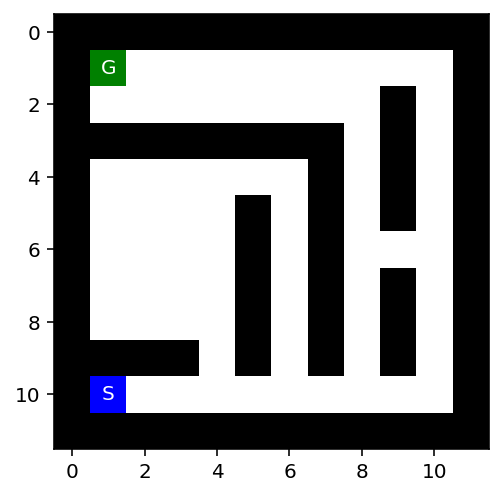

The algorithm took 88 iterations
Path cost:  -1
Maximum tree depth:  32
Maximum tree nodes:  10
Maximum size of the frontier:  5025
open_maze


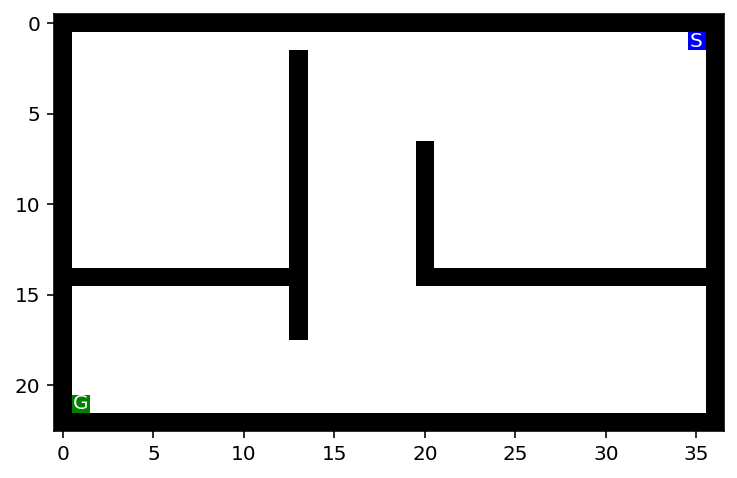

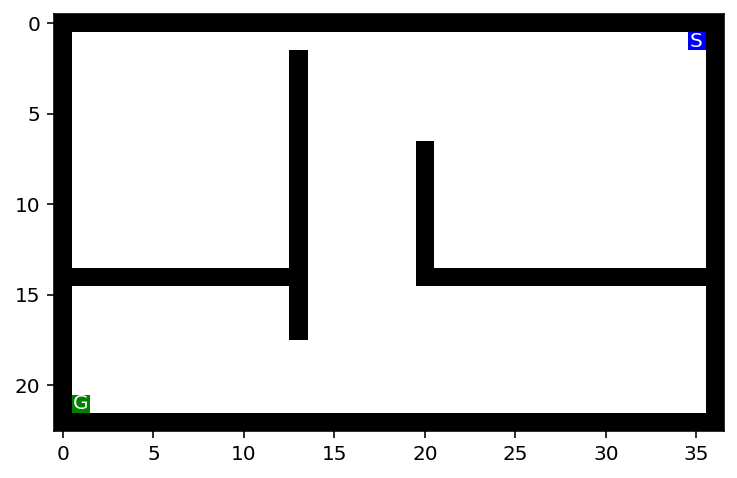

The algorithm took 88 iterations
Path cost:  -1
Maximum tree depth:  32
Maximum tree nodes:  37
Maximum size of the frontier:  5348
wall_maze


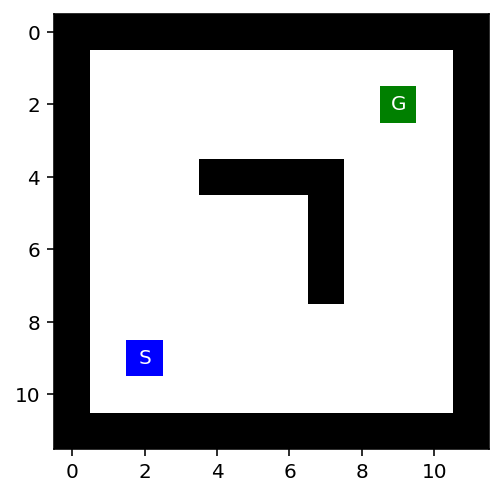

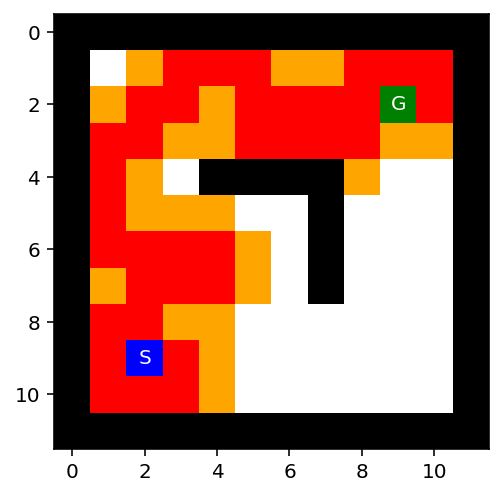

The algorithm took 88 iterations
Path cost:  36
Maximum tree depth:  36
Maximum tree nodes:  13
Maximum size of the frontier:  131


In [101]:
mazes = loadMazes(display=False)
DFSRTimes = []
DFSRCost = []
DFSRne = []
DFSRmtd = []
DFSRmtn = []
DFSRmfs = []
for m in mazes:
    print(m)
    mh.show_maze(mazes[m])
    start = time.time()
    node, path_cost, nodes_expanded, max_tree_depth, max_tree_nodes,max_frontier_size = DFS(mazes[m],verbose=False,choosing_method='random')
    stop = time.time()
    showPath(mazes[m], node)
    DFSRTimes.append(stop - start)
    DFSRCost.append(path_cost)
    DFSRne.append(nodes_expanded)
    DFSRmtd.append(max_tree_depth)
    DFSRmtn.append(max_tree_nodes)
    DFSRmfs.append(max_frontier_size)
    print(f"The algorithm took {node_expanded} iterations")
    print("Path cost: ", path_cost)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum tree nodes: ", max_tree_nodes)
    print("Maximum size of the frontier: ", max_frontier_size)

# How does BFS and DFS deal with loops (cycles)?

* Breadth First Search handles cycles by keeping trach of all nodes that have already been reached by the search algorithm. This prevent BFS from creating a cycle because it never moves to a position that has already been covered. Depth First Search does not keep trach of reached nodes like BFS and can create cycles. The above check for cycles does not check if the node has been visited by the algorithm in its entirety, but checks to make sure that the next node in the path is not already a part of the current path being traveled. This is the closest way to prevent loops from occuring, but it is not full proof and results in much more time required to find the correct path for a given maze. As seen in two examples here, depth first search can reach a cycle and not find the solution.

# Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

* The implementations of BFS as created above is complete as log as a path exists and can be solved in finite time. The time complexity for breadth first search is $O(n)$ and the space complexity is $O(n)$ (where $n$ is the number of nodes in the maze) because the worst case is every node must be reached and every node reached has to be stored. The depth first search algorithm has a time complexity of $O(n)$ and a space complexity of $O(d)$ (where $d$ is the depth of the current tree/path). Similar to BFS, the worst case for DFS is every node must be reached; however, the storage for the algorithm only keeps track of the nodes in the current path. This means that even if the algorithm has already surveyed nodes in the maze, if those nodes are not a part of the current path, the algorithm has no memory of already passing those nodes. BFS is always optimal, but DFS is not always optimal. DFS in the implementation above is not complete as a path existed, but it was not found. However, DFS is normally complete abd remains not optimal.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [14]:
def expand_greedy(maze, node, goal):
    exp = []
    # add every action
    if maze[node.pos[0]][node.pos[1] + 1] != 'X':
        exp.append(HNode(pos=(node.pos[0],node.pos[1] + 1), parent=node,action='e', cost=node.cost+1, goal=goal))
    if maze[node.pos[0]][node.pos[1] - 1] != 'X':
        exp.append(HNode(pos=(node.pos[0],node.pos[1] - 1), parent=node,action='w', cost=node.cost+1, goal=goal))
    if maze[node.pos[0] - 1][node.pos[1]] != 'X':
        exp.append(HNode(pos=(node.pos[0] - 1,node.pos[1]), parent=node,action='n', cost=node.cost+1, goal=goal))
    if maze[node.pos[0] + 1][node.pos[1]] != 'X':
        exp.append(HNode(pos=(node.pos[0] + 1,node.pos[1]), parent=node,action='s', cost=node.cost+1, goal=goal))
    random.shuffle(exp)
    return exp


In [15]:
# manhattan heuristic
def manhattan(pos1, pos2):
    #returns the Manhattan distance between two points
    return(np.sum(np.abs(np.subtract(pos1, pos2))))


def distance(pos1, pos2):
    x = pos1[0] - pos2[0]
    y = pos1[1] - pos2[1]
    return abs(x) + abs(y)

In [16]:
# new node to track heuristics inside node
class HNode:
    def __init__(self, pos, parent, action, cost, goal):
        self.pos = tuple(pos) # the state; positions are (row,col)
        self.parent = parent # reference to parent node. None means root␣node.
        self.action = action # action used in the transition function (rootnode has None)
        self.cost = cost # for uniform cost this is the depth. It is also g(n) for A* search
        self.heu_score = distance(pos, goal)

    def __gt__(self,other):
        return self.heu_score > other.heu_score
            
    def __lt__(self, other):
        return self.heu_score < other.heu_score

    def __str__(self):
        return f"Node Heu - pos = {self.pos}; parent = {repr(self.parent)};
                action = {self.action}; cost = {self.cost}; score {self.heu_score}"

In [52]:

def paint_maze(maze, reached, frontier, node):
    for r in reached:
        if maze[r[0]][r[1]] != 'S' and maze[r[0]][r[1]] != 'G':
            maze[r[0]][r[1]] = '.'
    for f in frontier.queue:
        if maze[f[1].pos[0]][f[1].pos[1]] != 'S' and maze[f[1].pos[0]][f[1].pos[1]] != 'G':
            maze[f[1].pos[0]][f[1].pos[1]] = 'F'
    while node != None:
        if maze[node.pos[0]][node.pos[1]] != 'S' and maze[node.pos[0]][node.pos[1]] != 'G':
            maze[node.pos[0]][node.pos[1]] = 'P'
        node = node.parent
    mh.show_maze(maze)

In [71]:
# greedy best-first
from queue import PriorityQueue
import copy
def greedy(maze, verbose=False):
    
    node_x_y = mh.find_pos(maze, what="S")
    goal_x_y = mh.find_pos(maze, what="G")
    root = HNode(pos=node_x_y, parent = None, action = None, cost = 0,goal=goal_x_y)
    
    if verbose:
        print(f"Starting state:\t{node_x_y}")
        print(f"Goal State:\t{goal_x_y}")

    if root.pos == goal_x_y:
        return root, 0, 0, 0, 0,0
    
    frontier = PriorityQueue()
    frontier.put((root.heu_score, root))
    reached = {}
    reached[root.pos] = root
    iteration = 0
    nodes_expanded = 0
    max_tree_depth = 1
    tree_size = 1
    max_frontier = 1

    
    if verbose:
        print(f"Frontier: {frontier.qsize()}")

    # look for goal
    while not frontier.empty():
        node = frontier.get()[1]
        nodes_expanded = nodes_expanded + 1
        if frontier.qsize() > max_frontier:
            max_frontier = frontier.qsize()
        reached[node.pos] = node
        if max_tree_depth < node.cost:
            max_tree_depth = node.cost
        
        if verbose:
            print(f"On iteration {iteration}: {node.__str__()}| Frontier:{frontier.qsize()} ")

        # if found goal
        if node.pos == goal_x_y:
            paint_maze(maze, reached, frontier, node)
            return node, node.cost, nodes_expanded, max_tree_depth, tree_size, max_frontier

        # expand
        exp = expand_greedy(maze, node, goal_x_y)

        if verbose:
            print(f"Expanded List: {len(exp)}")
            
        # loop through expansion
        for child in exp:
            c = child.pos
            tree_size += 1
            if verbose:
                for key, value in reached.items():
                    print(key, ' : ', value)
            if (c not in reached) and maze[c[0]][c[1]] != 'S':
                if verbose:
                    print(f"Adding {child} to the frontier")
                frontier.put((child.heu_score, child))

        
        if verbose:
            print(f"Finished iteration {iteration} and Frontier {frontier.qsize()} and isEmpty {frontier.empty()}")
        iteration += 1


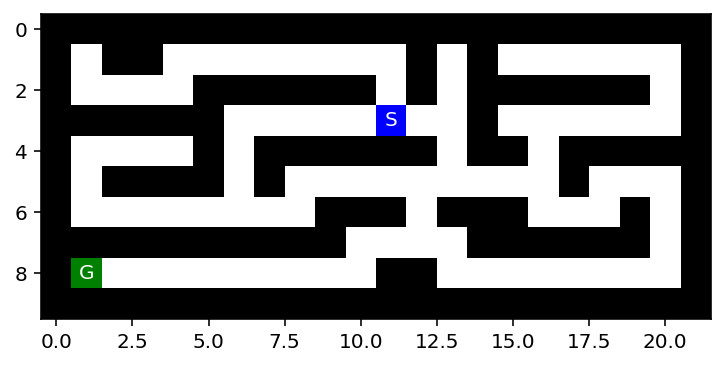

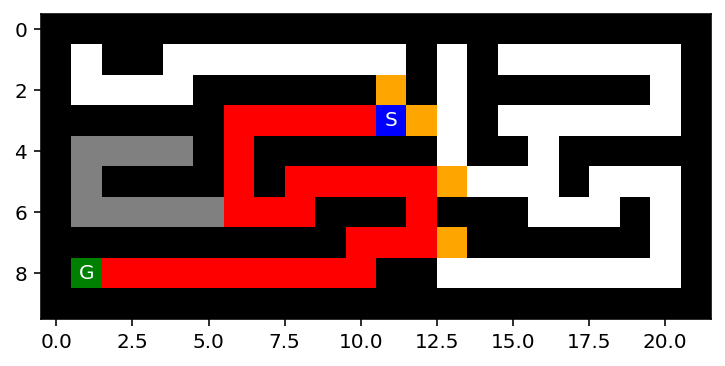

The algorithm took 40 iterations
Path cost:  29
Maximum tree depth:  29
Maximum tree nodes:  82
Maximum size of the frontier:  4


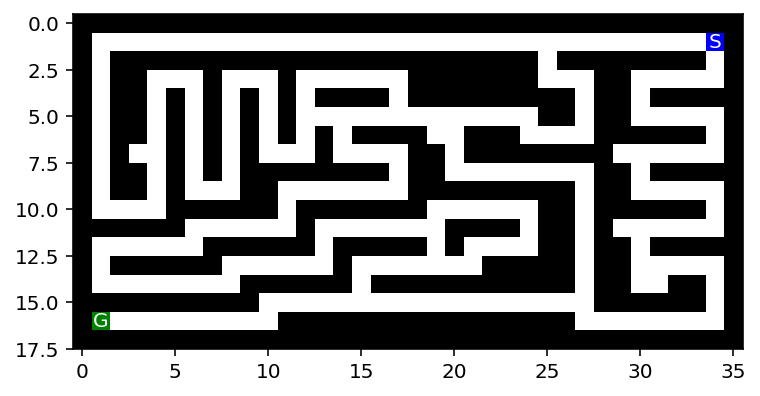

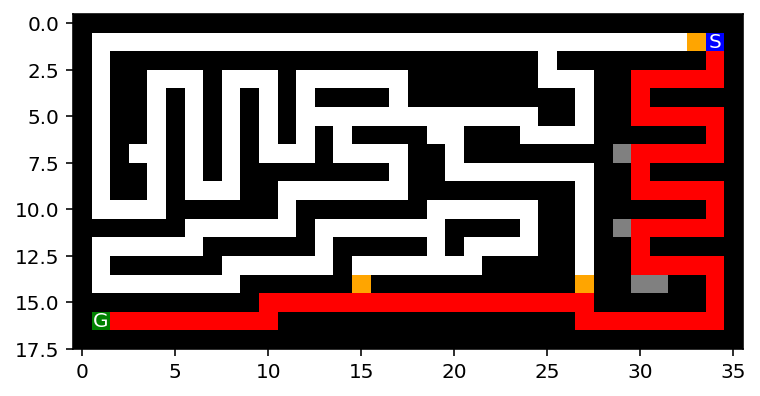

The algorithm took 82 iterations
Path cost:  74
Maximum tree depth:  74
Maximum tree nodes:  168
Maximum size of the frontier:  4


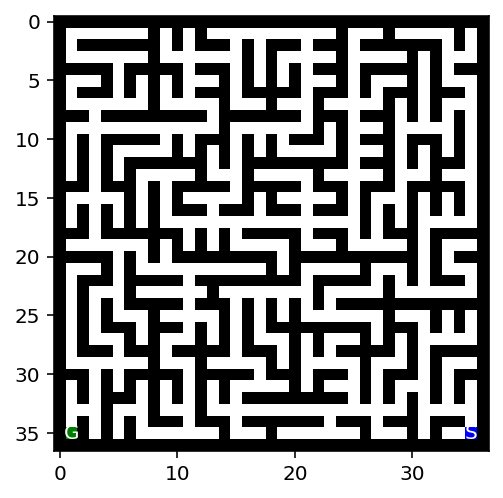

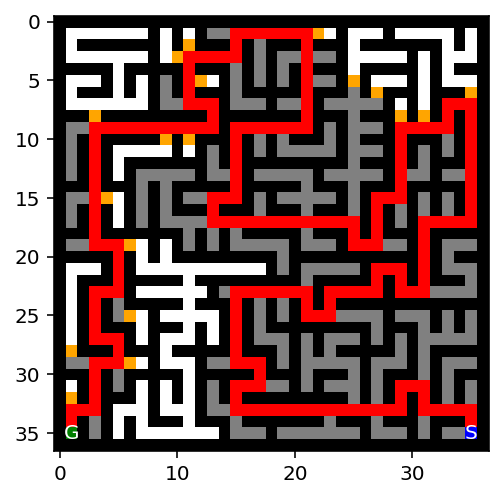

The algorithm took 471 iterations
Path cost:  210
Maximum tree depth:  210
Maximum tree nodes:  958
Maximum size of the frontier:  18


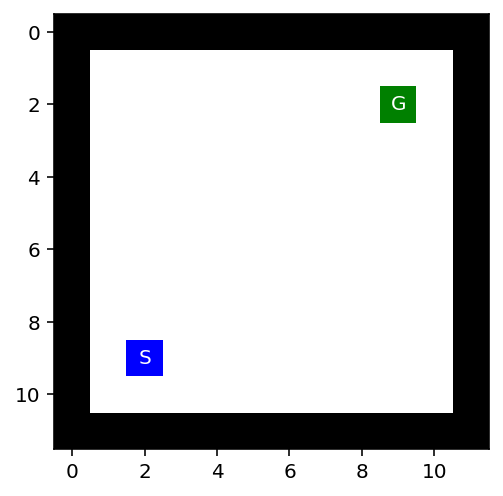

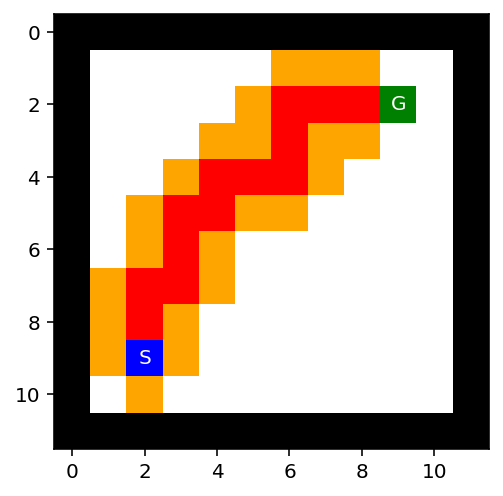

The algorithm took 15 iterations
Path cost:  14
Maximum tree depth:  14
Maximum tree nodes:  57
Maximum size of the frontier:  29


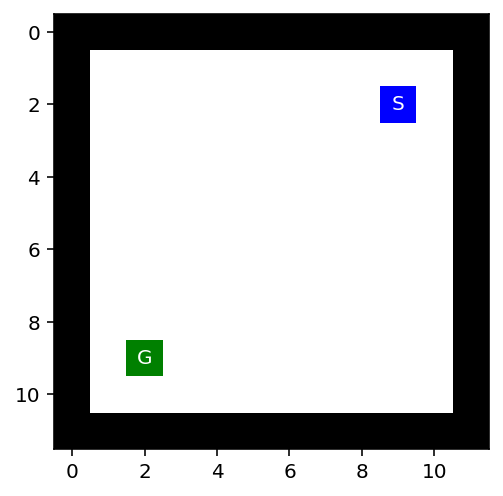

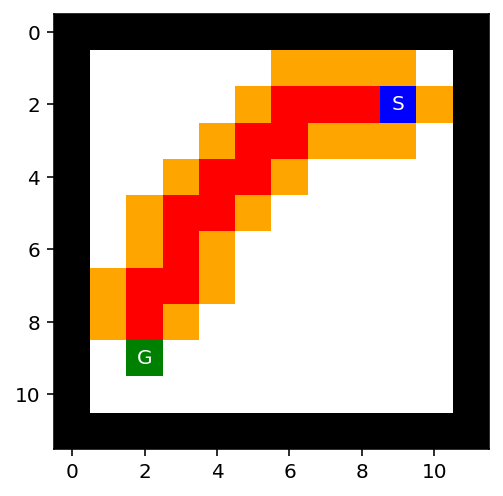

The algorithm took 15 iterations
Path cost:  14
Maximum tree depth:  14
Maximum tree nodes:  57
Maximum size of the frontier:  29


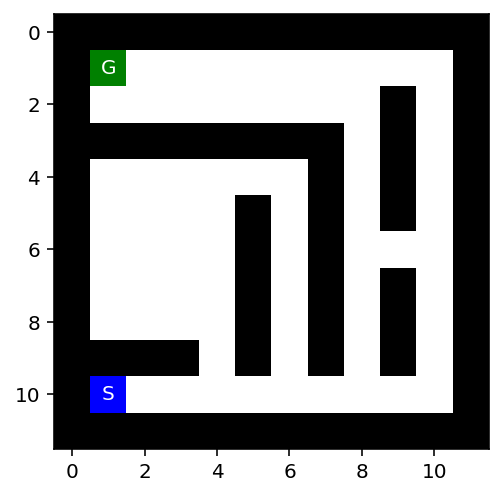

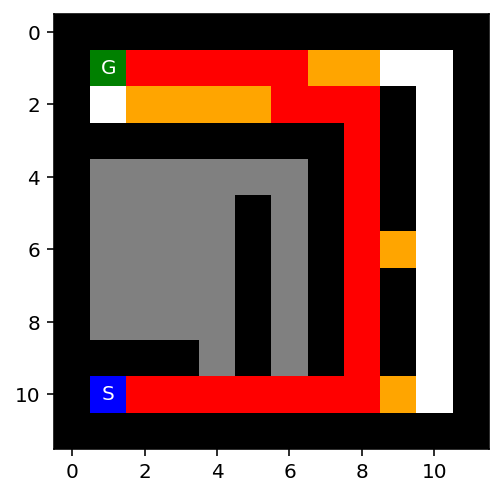

The algorithm took 110 iterations
Path cost:  23
Maximum tree depth:  23
Maximum tree nodes:  317
Maximum size of the frontier:  20


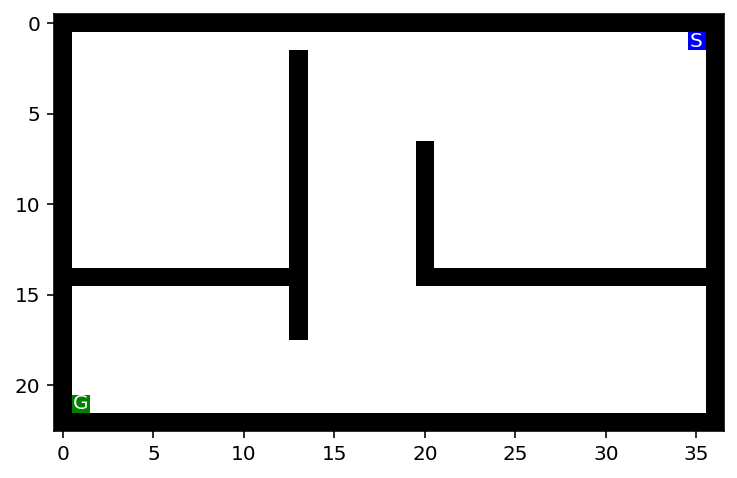

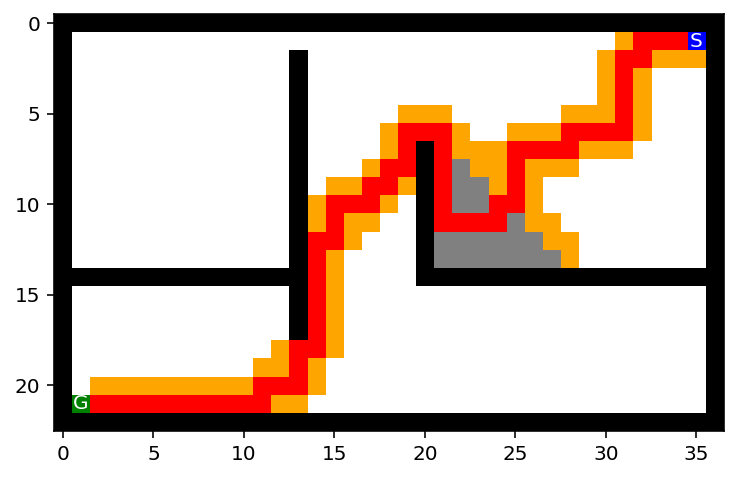

The algorithm took 207 iterations
Path cost:  64
Maximum tree depth:  64
Maximum tree nodes:  775
Maximum size of the frontier:  202


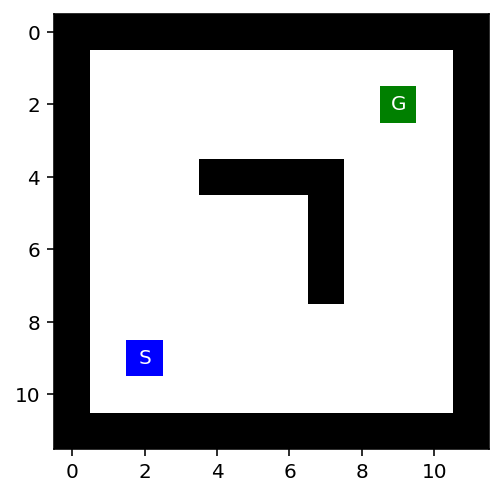

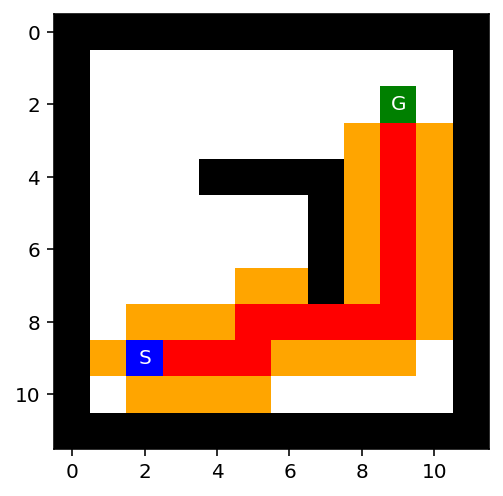

The algorithm took 15 iterations
Path cost:  14
Maximum tree depth:  14
Maximum tree nodes:  56
Maximum size of the frontier:  28


In [102]:
mazes = loadMazes(display=False)
GTimes = []
GCost = []
Gne = []
Gmtd = []
Gmtn = []
Gmfs = []
for m in mazes:
    mh.show_maze(mazes[m])
    start = time.time()
    node, path_cost, nodes_expanded, max_tree_depth, max_tree_nodes,max_frontier_size = greedy(mazes[m])
    stop = time.time()
    GTimes.append(stop - start)
    GCost.append(path_cost)
    Gne.append(nodes_expanded)
    Gmtd.append(max_tree_depth)
    Gmtn.append(max_tree_nodes)
    Gmfs.append(max_frontier_size)
    print(f"The algorithm took {nodes_expanded} iterations")
    print("Path cost: ", path_cost)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum tree nodes: ", max_tree_nodes)
    print("Maximum size of the frontier: ", max_frontier_size)

In [50]:
# A*
%time
def a_star(maze, verbose_text=False, verbose_maze=False):
    # initialize variables
    node_x_y = mh.find_pos(maze, what="S")
    goal_x_y = mh.find_pos(maze, what="G")
    root = HNode(pos=node_x_y, parent = None, action = None, cost = 0,goal=goal_x_y)

    # printing
    if verbose_text:
        print(f"Starting state:\t{node_x_y}")
        print(f"Goal State:\t{goal_x_y}")

    if verbose_maze:
        show_maze(maze)

    # base case --> root = goal
    if root.pos == goal_x_y:
        return root, 0, 0, 0, 0, 0

    # otherwise do function
    # initialize other variables
    frontier = PriorityQueue()
    frontier.put((root.heu_score + 0, root))
    reached = {}
    reached[root.pos] = root
    iteration = 0
    nodes_expanded = 1
    max_tree_depth = 1
    tree_size = 0
    max_frontier = 0

    # printing
    if verbose_text:
        print(f"Frontier: {frontier.qsize()}")

    # while looping through frontier, look for goal
    while not frontier.empty():
        node = frontier.get()[1]
        if node.cost > max_tree_depth:
            max_tree_depth = node.cost
        if frontier.qsize() > max_frontier:
            max_frontier = frontier.qsize()
        nodes_expanded += 1
        reached[node.pos] = node
        
        # printing
        if verbose_text:
            print(f"On iteration {iteration}: {node.__str__()}| Frontier:{frontier.qsize()} ")

        # if goal is found
        if node.pos == goal_x_y:
            paint_maze(maze, reached, frontier, node)
            return node, node.cost, nodes_expanded, max_tree_depth, tree_size,max_frontier

        #expand the popped node
        exp = expand_greedy(maze, node, goal_x_y)
        if verbose_text:
            print(f"Expaned List: {len(exp)}")
            print(strListOfNodes(exp))

        for child in exp:
            c = child.pos
            if verbose_text:
                for key, value in reached.items():
                    print(key, ' : ', value)
            if (c not in reached) and maze[c[0]][c[1]] != 'S':
                if verbose_text:
                    print(f"adding {child} to the frontier")
                frontier.put((child.heu_score + child.cost, child))
                tree_size += 1

        if verbose_text:
            print(f"finished iteration {iteration} and Frontier {frontier.qsize()} and isEmpty {frontier.empty()}")
        iteration = iteration + 1
        if verbose_maze:
            paint_maze(maze, reached, frontier, node)

Wall time: 0 ns


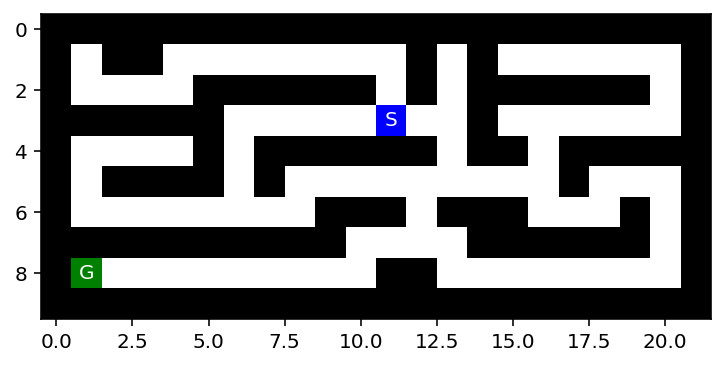

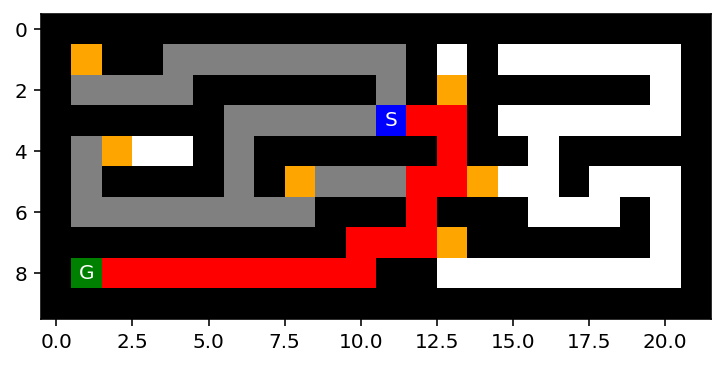

The algorithm took 55 steps
Path length: 19
Reached squares: 55
Maximum tree depth:  19
Maximum size of the frontier:  6


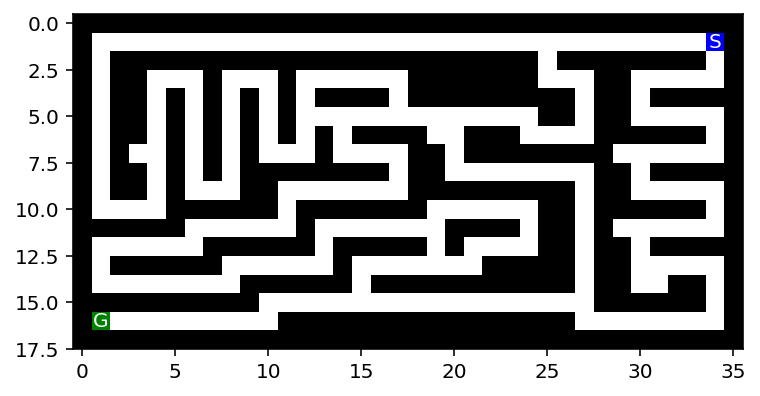

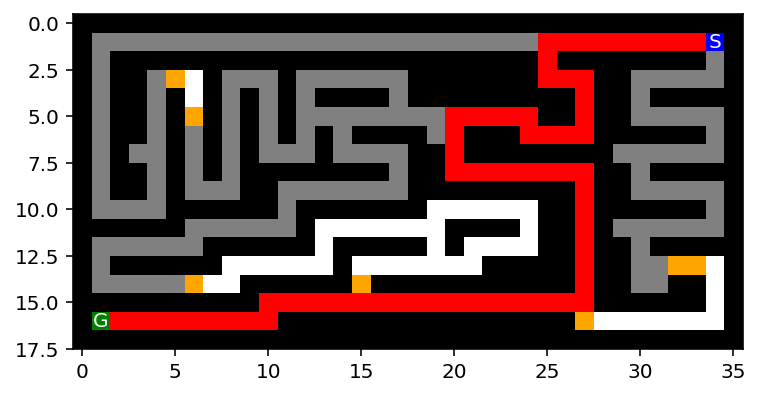

The algorithm took 225 steps
Path length: 68
Reached squares: 225
Maximum tree depth:  68
Maximum size of the frontier:  7


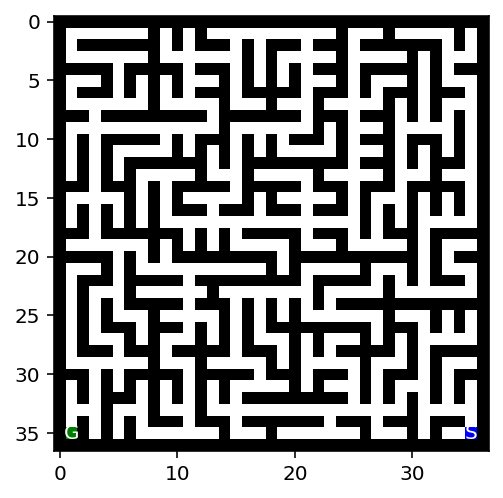

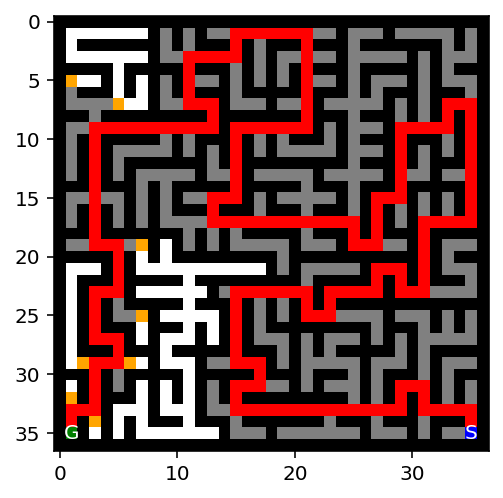

The algorithm took 539 steps
Path length: 210
Reached squares: 539
Maximum tree depth:  210
Maximum size of the frontier:  12


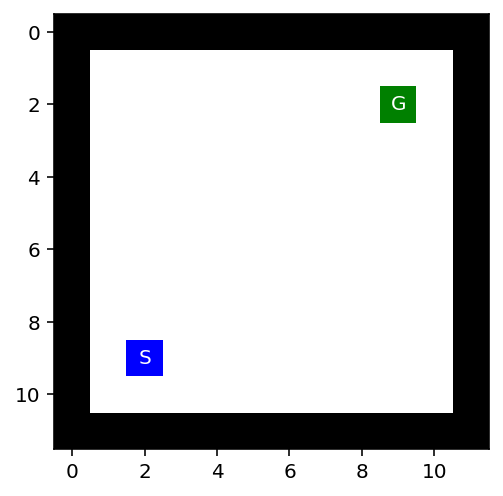

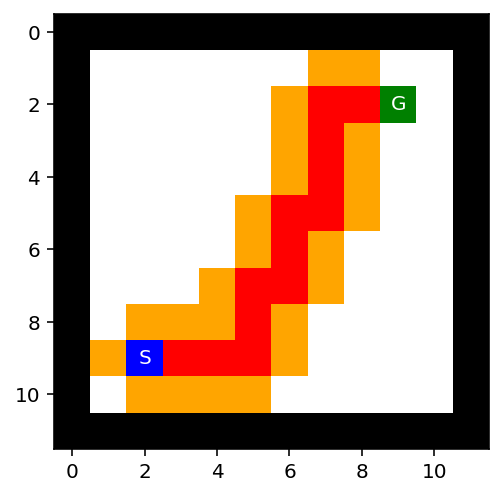

The algorithm took 16 steps
Path length: 14
Reached squares: 16
Maximum tree depth:  14
Maximum size of the frontier:  29


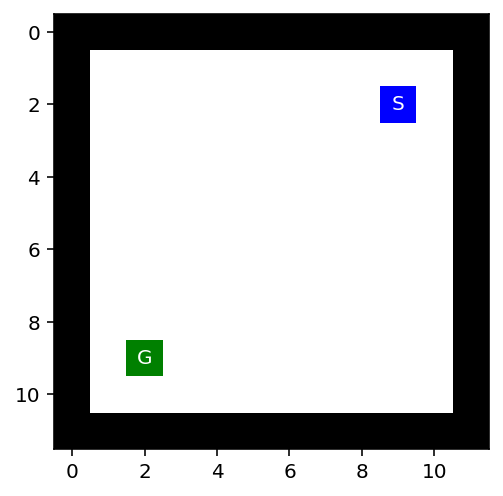

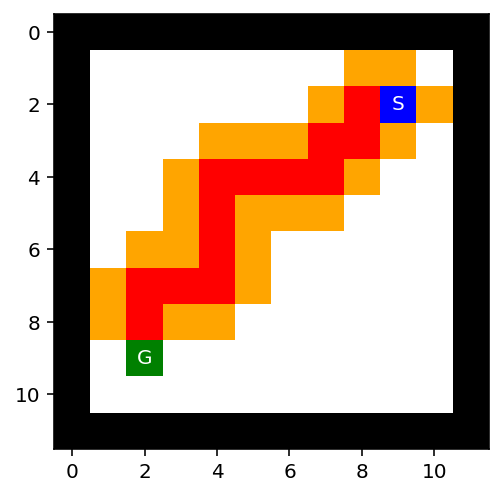

The algorithm took 16 steps
Path length: 14
Reached squares: 16
Maximum tree depth:  14
Maximum size of the frontier:  29


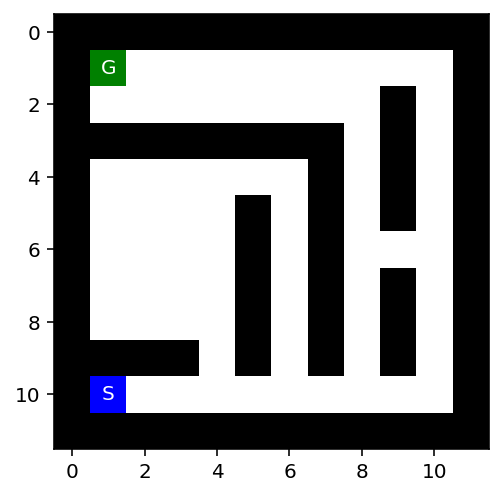

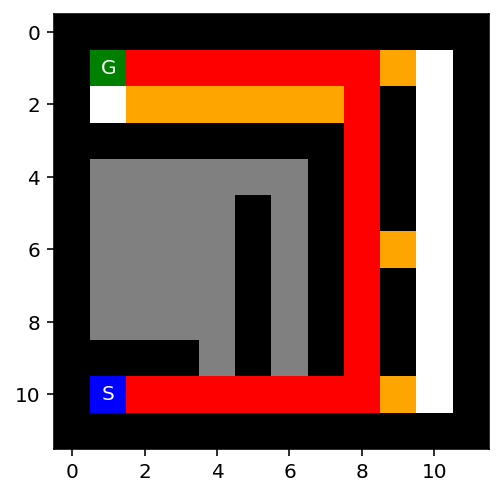

The algorithm took 68 steps
Path length: 23
Reached squares: 68
Maximum tree depth:  23
Maximum size of the frontier:  14


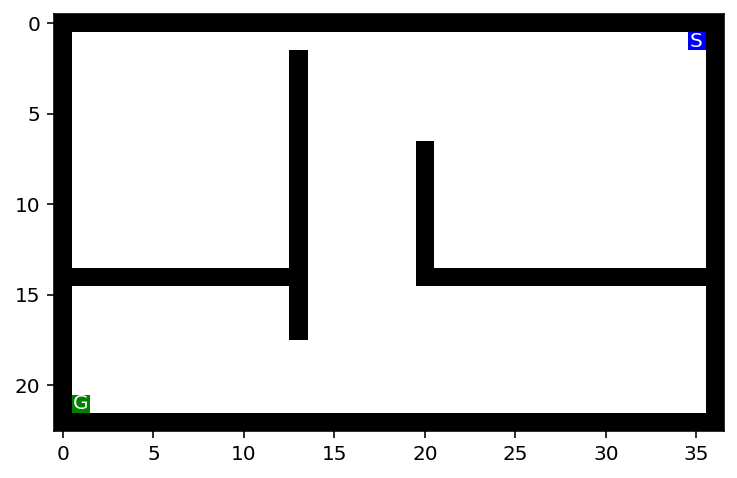

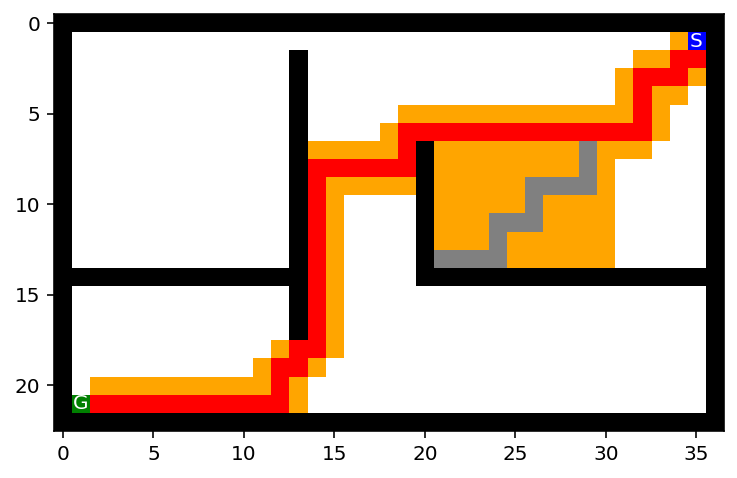

The algorithm took 119 steps
Path length: 54
Reached squares: 119
Maximum tree depth:  54
Maximum size of the frontier:  135


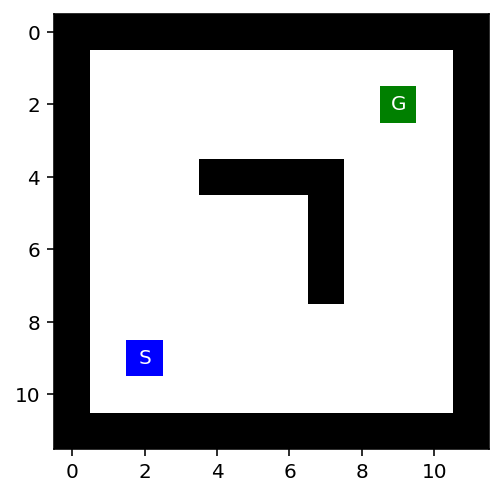

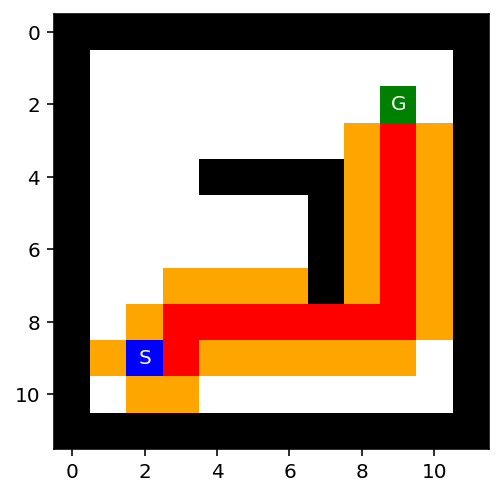

The algorithm took 16 steps
Path length: 14
Reached squares: 16
Maximum tree depth:  14
Maximum size of the frontier:  28


In [103]:
mazes = loadMazes()
ATimes = []
ACost = []
Ane = []
Amtd = []
Amtn = []
Amfs = []
for m in mazes:
    mh.show_maze(mazes[m])
    start = time.time()
    node, path_cost, nodes_expanded, max_tree_depth, tree_size, max_frontier_size = a_star(mazes[m], verbose_text=False, verbose_maze=False)
    stop = time.time()
    ATimes.append(stop - start)
    ACost.append(path_cost)
    Ane.append(nodes_expanded)
    Amtd.append(max_tree_depth)
    Amtn.append(max_tree_nodes)
    Amfs.append(max_frontier_size)
    print(f"The algorithm took {nodes_expanded} steps")
    print('Path length:', path_cost)
    print('Reached squares:', nodes_expanded)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum size of the frontier: ", max_frontier_size)
    

# Are your implementations complete and optimal? What is the time and space complexity?

* The greedy best first search is not optimal, but is complete for all graphs in which a path exists. This is due to teh heuristic being used to determine the path chosen. This always choses the first path whcih may or may not always be th e most optimal path to the goal. The time complexity for the greedy algorithm is $O(b^m)$ where b is the branching factor and m is the maximum depth of the tree (based on the manhattan hueristic used in this test). The storage follows the same pattern with the complexity being $O(b^m)$.
* A* search is both optimal and complete like BFS and DFS. The time and space complexity are the same as they are dependent on the functions $g(n)$, the cost to reach the current node $n$, and $h(n)$, the heuristic at the current node. The time complexity and space complexity are $g(n) + h(n)$


## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [107]:
import pandas as pd
import numpy as np
smallMaze = [[BFSCost[0], BFSne[0], BFSmtd[0], BFSmtn[0], BFSmfs[0]],
            [DFSCost[0], DFSne[0], DFSmtd[0], DFSmtn[0], DFSmfs[0]],
             [DFSRCost[0], DFSRne[0], DFSRmtd[0], DFSRmtn[0], DFSRmfs[0]],
             [GCost[0], Gne[0], Gmtd[0], Gmtn[0], Gmfs[0]],
             [ACost[0], Ane[0], Amtd[0], Amtn[0], Amfs[0]]]

sMaze = np.array(smallMaze)
smallMaze = pd.DataFrame(sMaze, columns = ['Path Cost', '# of Nodes Expanded', 'Max Tree Depth',
                                           'Max Memory', 'Max Frontier Size'])
smallMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Small Maze")
smallMaze

Small Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,19,92,19,94,9
1,DFS,37,93,45,5,187
2,DFSR,49,78,49,8,158
3,GBS,29,40,29,82,4
4,A*,19,55,19,56,6


In [108]:
index = 1
mediumMaze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

mMaze = np.array(mediumMaze)
mediumMaze = pd.DataFrame(mMaze, columns = ['Path Cost', '# of Nodes Expanded', 'Max Tree Depth', 
                                            'Max Memory', 'Max Frontier Size'])
mediumMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Medium Maze")
mediumMaze

Medium Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,68,269,68,272,8
1,DFS,134,289,191,46,591
2,DFSR,70,622,205,41,1265
3,GBS,74,82,74,168,4
4,A*,68,225,68,56,7


In [109]:
index = 2
largeMaze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

lMaze = np.array(largeMaze)
largeMaze = pd.DataFrame(lMaze, columns = ['Path Cost', '# of Nodes Expanded', 'Max Tree Depth',
                                           'Max Memory', 'Max Frontier Size'])
largeMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Large Maze")
largeMaze

Large Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,210,622,210,626,8
1,DFS,210,489,223,8,1013
2,DFSR,210,351,215,22,746
3,GBS,210,471,210,958,18
4,A*,210,539,210,56,12


In [110]:
index = 3
emptyMaze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

eMaze = np.array(emptyMaze)
emptyMaze = pd.DataFrame(eMaze, columns = ['Path Cost', '# of Nodes Expanded', 'Max Tree Depth',
                                           'Max Memory', 'Max Frontier Size'])
emptyMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Empty Maze")
emptyMaze

Empty Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,14,95,14,98,12
1,DFS,18,18,18,17,58
2,DFSR,-1,1582,215,31,5168
3,GBS,14,15,14,57,29
4,A*,14,16,14,56,29


In [111]:
index = 4
empty2Maze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

e2Maze = np.array(empty2Maze)
empty2Maze = pd.DataFrame(e2Maze, columns = ['Path Cost', '# of Nodes Expanded', 
                                             'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
empty2Maze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Empty 2 Maze")
empty2Maze

Empty 2 Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,14,95,14,98,12
1,DFS,88,88,88,3,322
2,DFSR,32,32,32,24,113
3,GBS,14,15,14,57,29
4,A*,14,16,14,56,29


In [151]:
index = 5
loopMaze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

loop = np.array(loopMaze)
loopMaze = pd.DataFrame(loop, columns = ['Path Cost', '# of Nodes Expanded', 
                                         'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
loopMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Loops Maze")
loopMaze

Loops Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,23,71,23,72,7
1,DFS,35,48,41,24,113
2,DFSR,-1,1669,32,10,5025
3,GBS,23,110,23,317,20
4,A*,23,68,23,56,14


In [114]:
index = 6
openMaze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

openM = np.array(openMaze)
openMaze = pd.DataFrame(openM, columns = ['Path Cost', '# of Nodes Expanded', 
                                          'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
openMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Open Maze")
openMaze

Open Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,54,683,54,684,23
1,DFS,-1,1660,41,2,5295
2,DFSR,-1,1423,32,37,5348
3,GBS,64,207,64,775,202
4,A*,54,119,54,56,135


In [116]:
index = 7
wallMaze = [[BFSCost[index], BFSne[index], BFSmtd[index], BFSmtn[index], BFSmfs[index]],
            [DFSCost[index], DFSne[index], DFSmtd[index], DFSmtn[index], DFSmfs[index]],
             [DFSRCost[index], DFSRne[index], DFSRmtd[index], DFSRmtn[index], DFSRmfs[index]],
             [GCost[index], Gne[index], Gmtd[index], Gmtn[index], Gmfs[index]],
             [ACost[index], Ane[index], Amtd[index], Amtn[index], Amfs[index]]]

wall = np.array(wallMaze)
wallMaze = pd.DataFrame(wall, columns = ['Path Cost', '# of Nodes Expanded', 
                                         'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
wallMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS', 'DFSR', 'GBS', 'A*'])
print("Wall Maze")
wallMaze

Wall Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,14,88,14,91,11
1,DFS,18,18,18,17,58
2,DFSR,36,40,36,13,131
3,GBS,14,15,14,56,28
4,A*,14,16,14,56,28


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

Path Cost


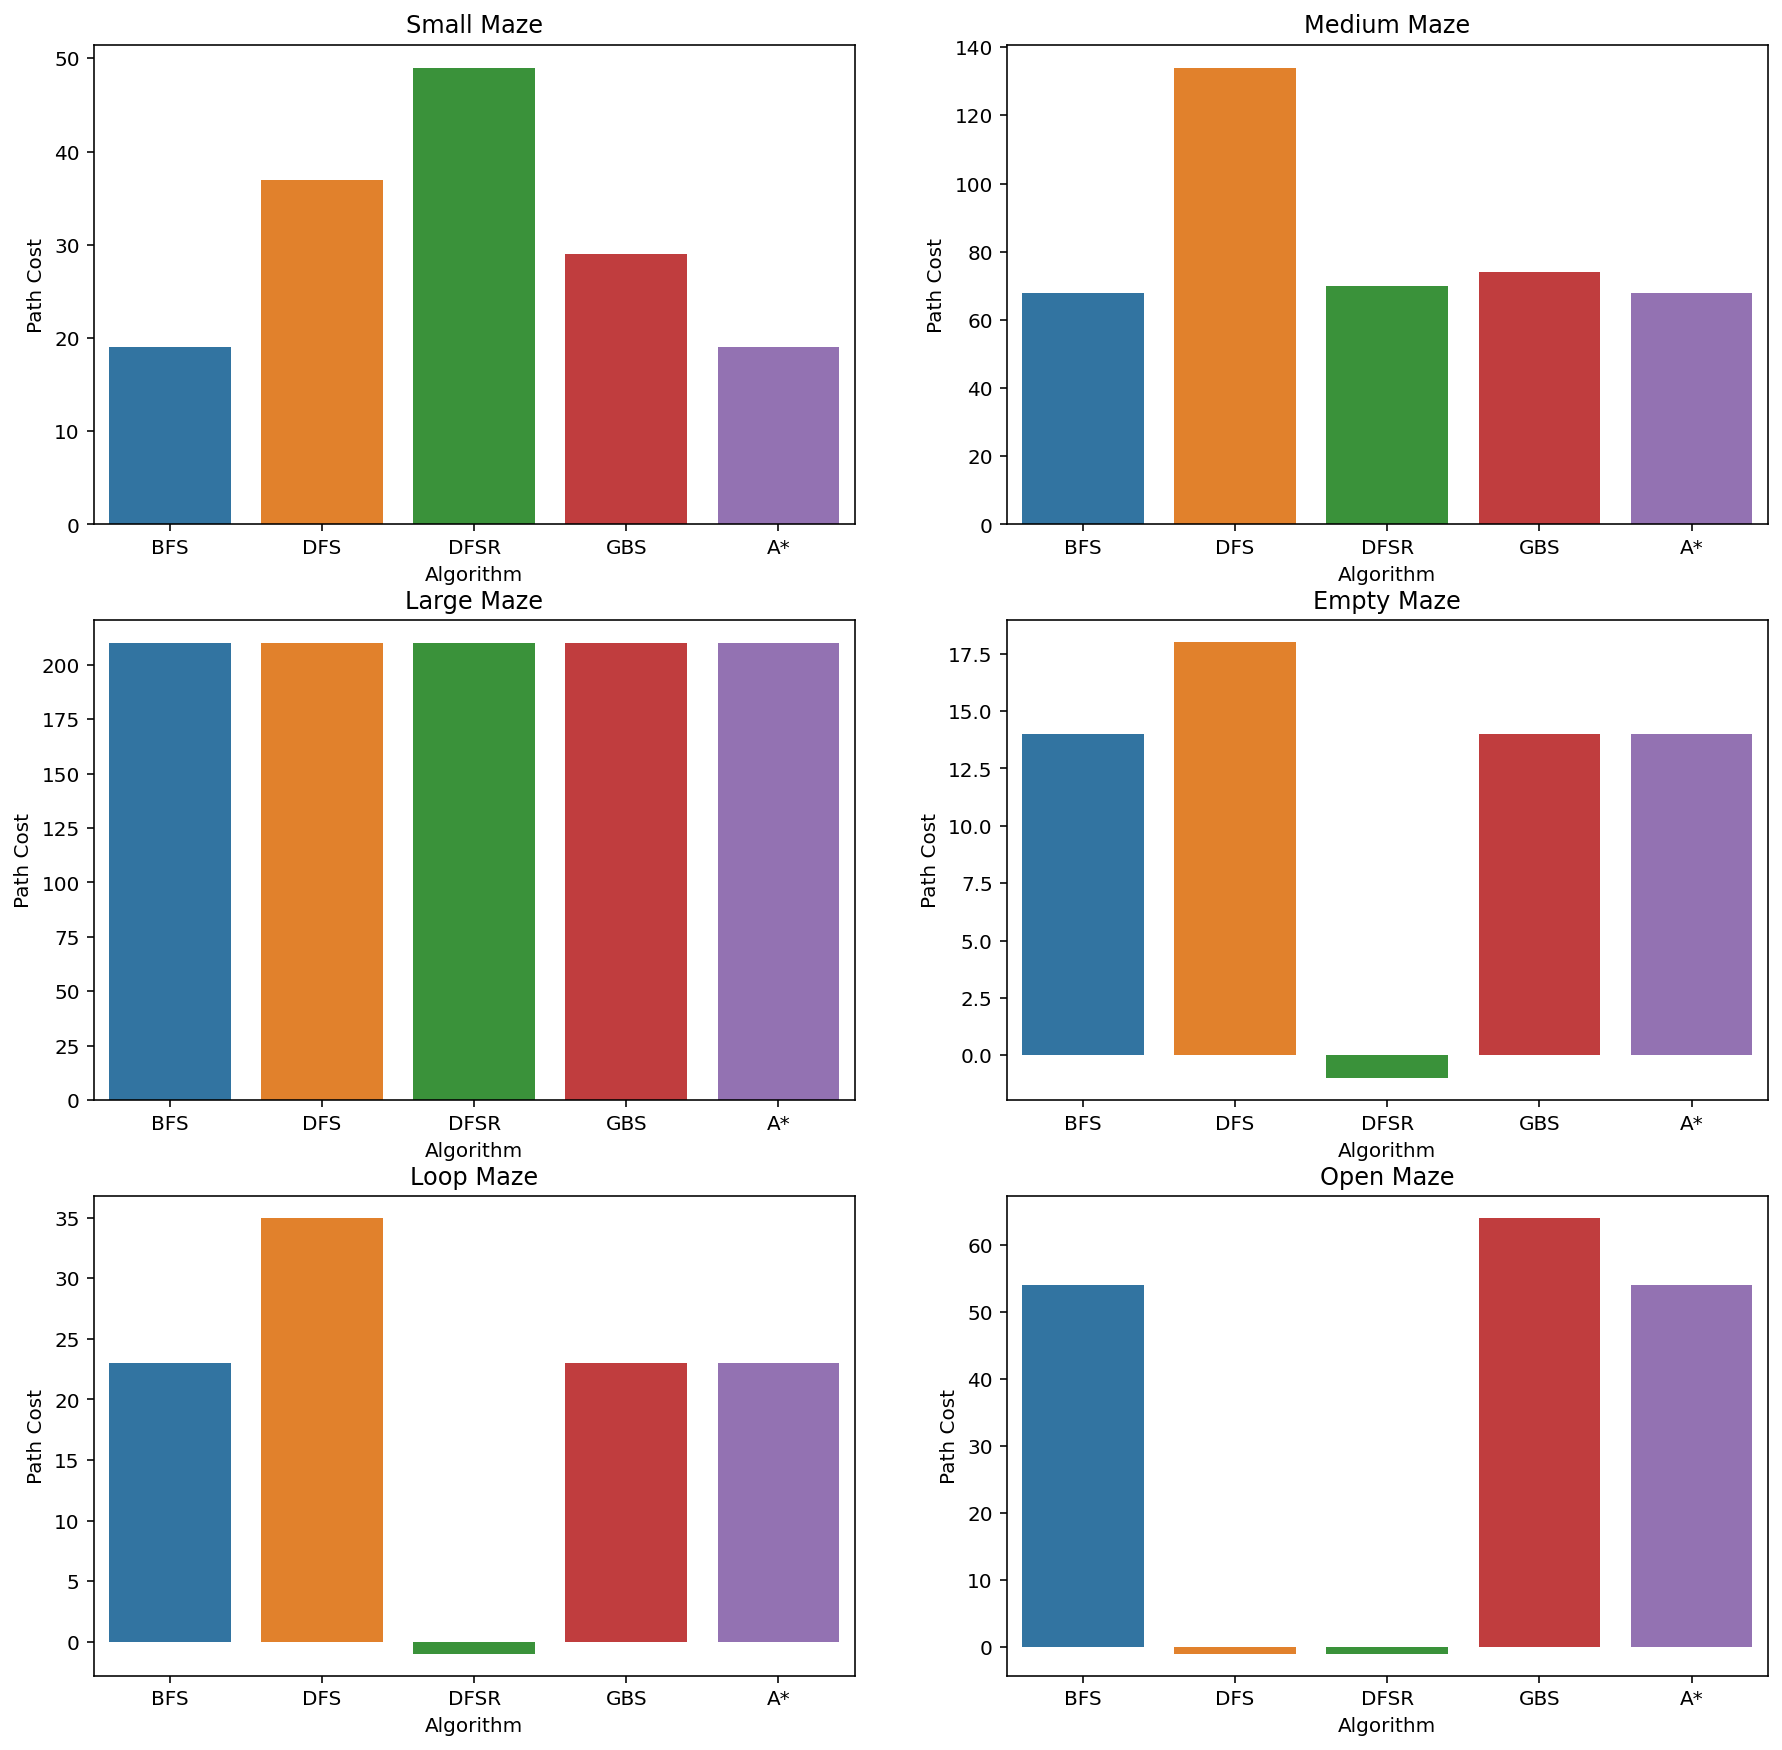

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,2, figsize=(15,15))
sns.barplot(ax = axs[0][0], x="Algorithm", y="Path Cost", data = smallMaze)
axs[0][0].set_title("Small Maze")
sns.barplot(ax = axs[0][1], x="Algorithm", y="Path Cost", data = mediumMaze)
axs[0][1].set_title("Medium Maze")
sns.barplot(ax = axs[1][0], x="Algorithm", y="Path Cost", data = largeMaze)
axs[1][0].set_title("Large Maze")
sns.barplot(ax = axs[1][1], x="Algorithm", y="Path Cost", data = emptyMaze)
axs[1][1].set_title("Empty Maze")
sns.barplot(ax = axs[2][0], x="Algorithm", y="Path Cost", data = loopMaze)
axs[2][0].set_title("Loop Maze")
sns.barplot(ax = axs[2][1], x="Algorithm", y="Path Cost", data = openMaze)
axs[2][1].set_title("Open Maze")
print("Path Cost")

Max Tree Depth


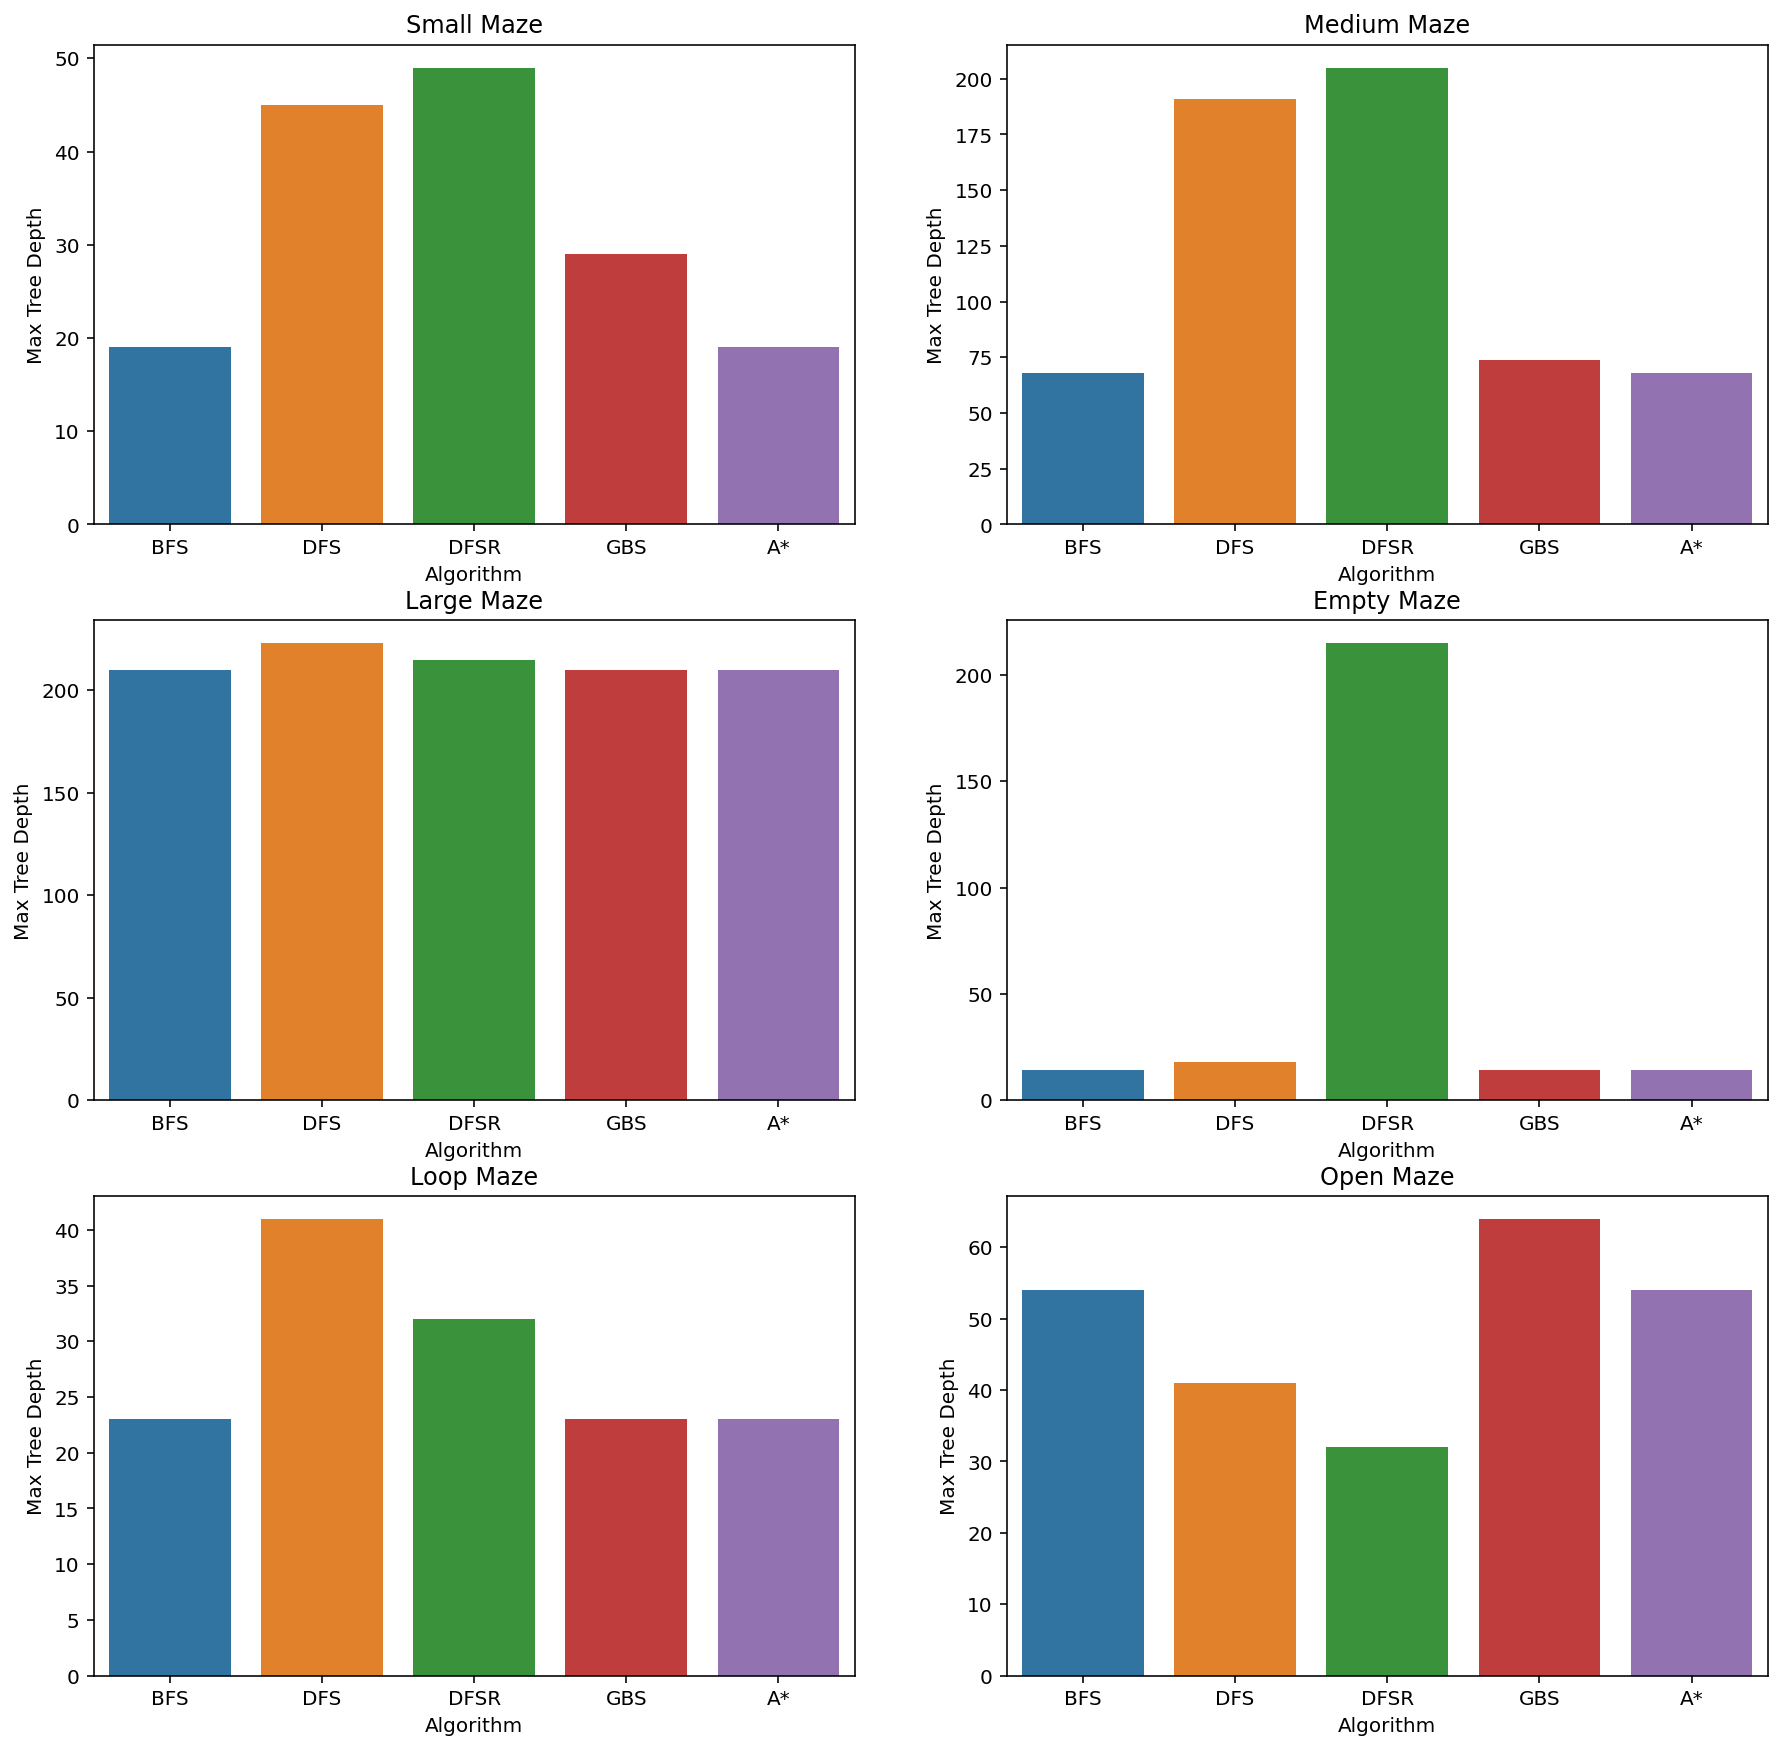

In [159]:
fig, axs = plt.subplots(3,2, figsize=(15,15))
sns.barplot(ax = axs[0][0], x="Algorithm", y="Max Tree Depth", data = smallMaze)
axs[0][0].set_title("Small Maze")
sns.barplot(ax = axs[0][1], x="Algorithm", y="Max Tree Depth", data = mediumMaze)
axs[0][1].set_title("Medium Maze")
sns.barplot(ax = axs[1][0], x="Algorithm", y="Max Tree Depth", data = largeMaze)
axs[1][0].set_title("Large Maze")
sns.barplot(ax = axs[1][1], x="Algorithm", y="Max Tree Depth", data = emptyMaze)
axs[1][1].set_title("Empty Maze")
sns.barplot(ax = axs[2][0], x="Algorithm", y="Max Tree Depth", data = loopMaze)
axs[2][0].set_title("Loop Maze")
sns.barplot(ax = axs[2][1], x="Algorithm", y="Max Tree Depth", data = openMaze)
axs[2][1].set_title("Open Maze")
print("Max Tree Depth")

Max Memory


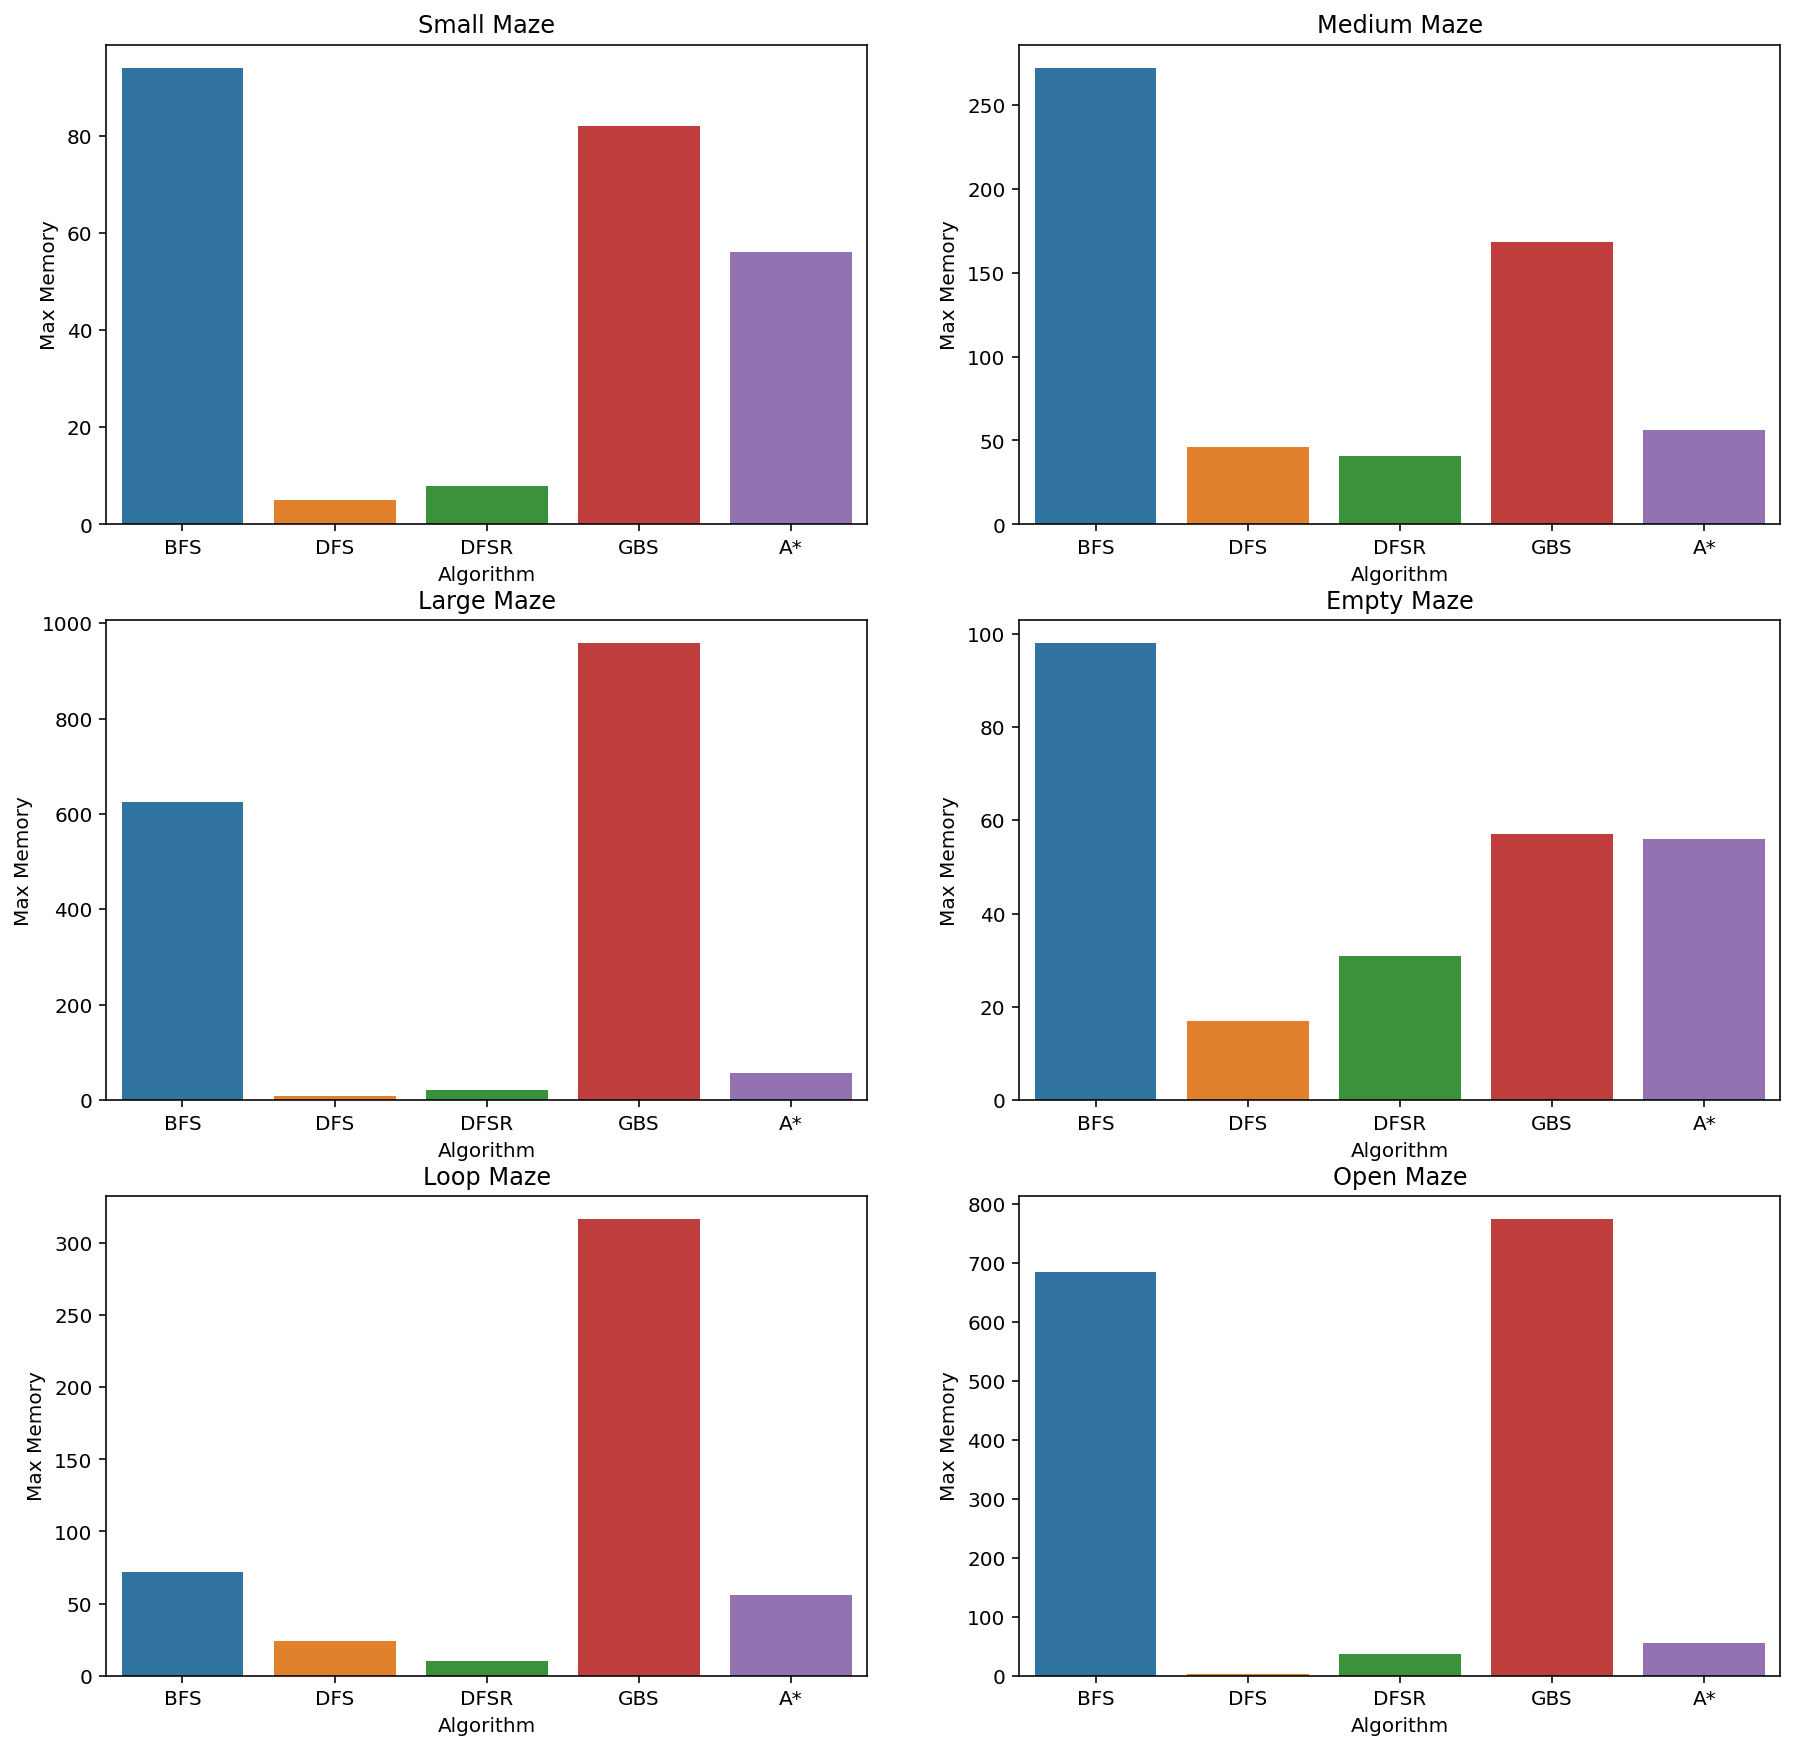

In [160]:
fig, axs = plt.subplots(3,2, figsize=(15,15))
sns.barplot(ax = axs[0][0], x="Algorithm", y="Max Memory", data = smallMaze)
axs[0][0].set_title("Small Maze")
sns.barplot(ax = axs[0][1], x="Algorithm", y="Max Memory", data = mediumMaze)
axs[0][1].set_title("Medium Maze")
sns.barplot(ax = axs[1][0], x="Algorithm", y="Max Memory", data = largeMaze)
axs[1][0].set_title("Large Maze")
sns.barplot(ax = axs[1][1], x="Algorithm", y="Max Memory", data = emptyMaze)
axs[1][1].set_title("Empty Maze")
sns.barplot(ax = axs[2][0], x="Algorithm", y="Max Memory", data = loopMaze)
axs[2][0].set_title("Loop Maze")
sns.barplot(ax = axs[2][1], x="Algorithm", y="Max Memory", data = openMaze)
axs[2][1].set_title("Open Maze")
print("Max Memory")

# Discuss the most important lessons you have learned from implementing the different search strategies. 

* The analysis of varius searching algorithms provided several key findings due to the experiments run. I ran each maze through Breadth First Search, Depth First Search, Greedy Best First Search, and A* search. In addition, I included a Depth First Search with random actions because the original depth first search uses an educated guess at the best action (always try south and west first). 

* The first notable thing about the data is the failure of Depth First Search when loops are present. Depth first search also has a higher path cost than other functions. This is due to Depth First Search lacking the optimal path choosing that BFS and A* have. In addition, the diagrams show that for large enough mazes, the cost of each algorithm is relatively the same. If path cost is what is prioritized when searching than breadth first seach and A* are preffered.

* When addressing the maximum depth of the tree or the longest path that was made by the algorithm, we can see that the more complex mazes result in much larger trees being created even when the path chosen is much smaller than the depth. This can be illustrated in the DFS and DFSR bars as they show deeper trees for the somewhat crowded medium graph. The Large Maze continued to show relatively similar values which indicates that it is even across all algorithms in the two categories.

* Max memory is where we see the dailures of BFS and GBS. Each of these use substantially more memory than the other algorithms for most mazes. This demonstrates the usefulness of DFS and A* for complex and larger mazes. The large mazes must have reached nodes stroed in the algorithm while DFS doesn't hold onto to failed paths. So when looking at the large maze again, we can see that despite each being relatively even in max tree size and path cost, the DFS and A* save substantially more space than the others.

* Other notable features include the DFS algorithm failing in the open maze. This is due to finding cycles very easily in the open maze. DFS appears to excel when the path is finite and direct. When there are more oppurtunities to create a cycle this method fails. A* appears to be the best algorithm all around as this one falls in the middle in almost every category accross all mazes as it attempts to reach the goal quickly without stroing as much as the BFS and GBS algorithms.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [164]:
def loadNewMazes(display=False):
    mazes = {}
    
    f = open("medium_maze.txt", "r")
    medium_maze_str = f.read()
    mazes["medium_maze"] = mh.parse_maze(medium_maze_str)
    if display: mh.show_maze(mazes["medium_maze"])
        
    f = open("medium_mazeV1.txt", "r")
    medium_maze_str = f.read()
    mazes["medium_mazeV1"] = mh.parse_maze(medium_maze_str)
    if display: mh.show_maze(mazes["medium_mazeV1"])
    
    f = open("medium_mazeV2.txt", "r")
    medium_maze_str = f.read()
    mazes["medium_mazeV2"] = mh.parse_maze(medium_maze_str)
    if display: mh.show_maze(mazes["medium_mazeV2"])
        
    f = open("medium_mazeV3.txt", "r")
    medium_maze_str = f.read()
    mazes["medium_mazeV3"] = mh.parse_maze(medium_maze_str)
    if display: mh.show_maze(mazes["medium_mazeV3"])
        
    
    f = open("medium_mazeV4.txt", "r")
    medium_maze_str = f.read()
    mazes["medium_mazeV4"] = mh.parse_maze(medium_maze_str)
    if display: mh.show_maze(mazes["medium_mazeV4"])
    return mazes



In [165]:
import numpy as np
def findGoals(maze): #taken from maze_helper.py to get multiple goals
    """
    Find start/goal in a maze and returns the all. 
    Caution: there is no error checking!
    
    Parameters:
    maze: a array with characters prodced by parse_maze()
     
    'G' for goal
    
    Returns:
    an array tupple (x, y) for the found position.
    """
    
    # where returns two arrays with all found positions\
    pos = np.where(maze == 'G')
    tupleSet = []
    for i in range(len(pos[0])):
        tupleSet.append(tuple([pos[0][i], pos[1][i]]))
    return tupleSet


medium_maze


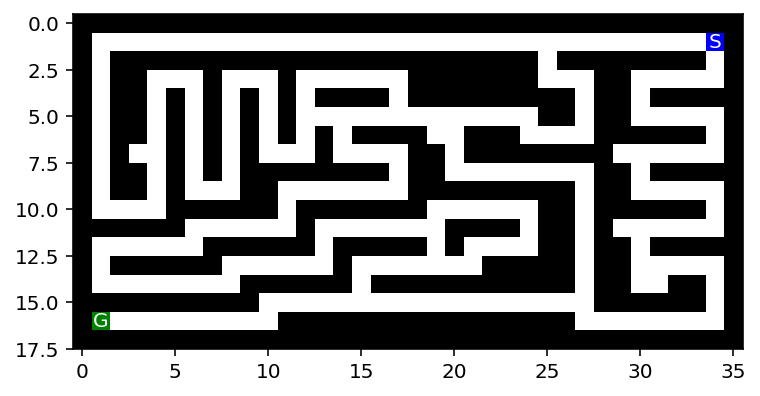

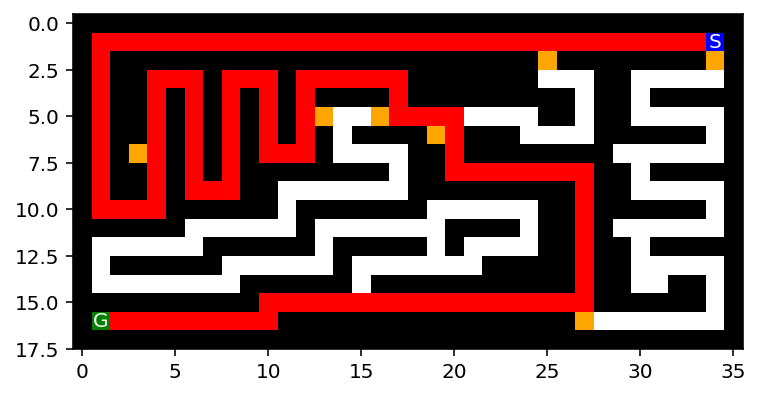

The algorithm took 289 iterations
Path cost:  134
Maximum tree depth:  191
Maximum tree nodes:  46
Maximum size of the frontier:  591
medium_mazeV1


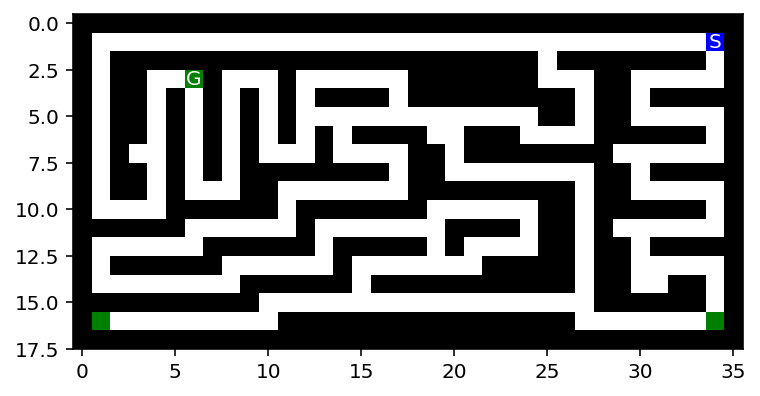

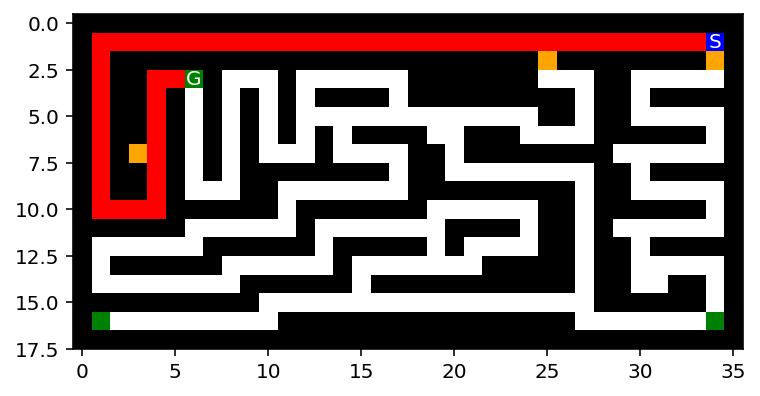

The algorithm took 54 iterations
Path cost:  54
Maximum tree depth:  54
Maximum tree nodes:  12
Maximum size of the frontier:  109
medium_mazeV2


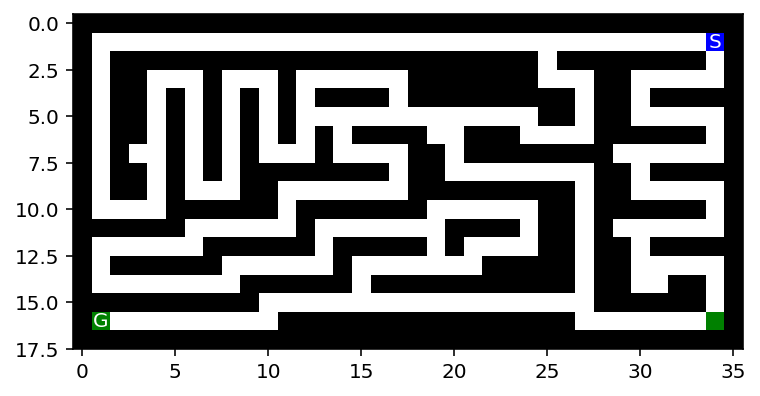

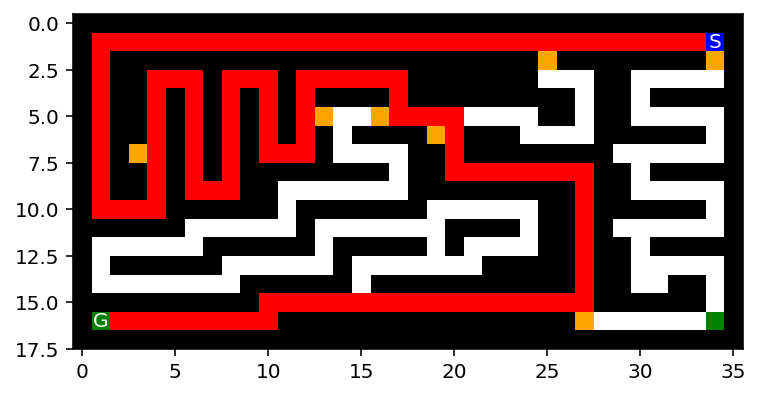

The algorithm took 289 iterations
Path cost:  134
Maximum tree depth:  191
Maximum tree nodes:  46
Maximum size of the frontier:  591
medium_mazeV3


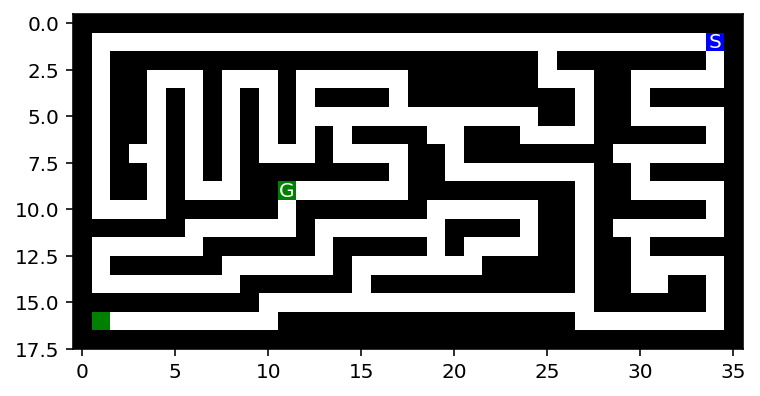

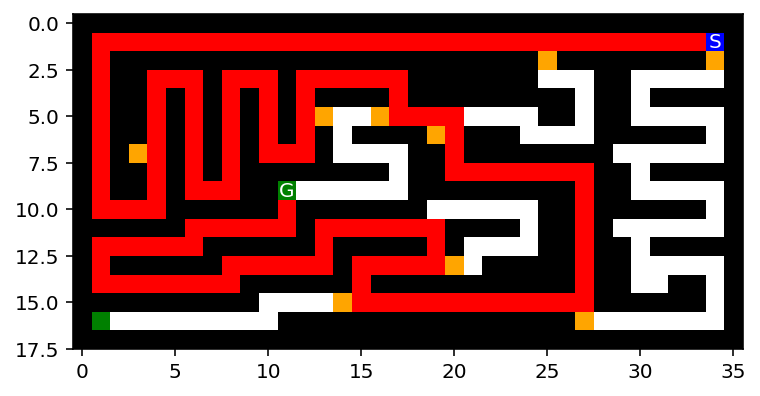

The algorithm took 191 iterations
Path cost:  163
Maximum tree depth:  163
Maximum tree nodes:  45
Maximum size of the frontier:  392
medium_mazeV4


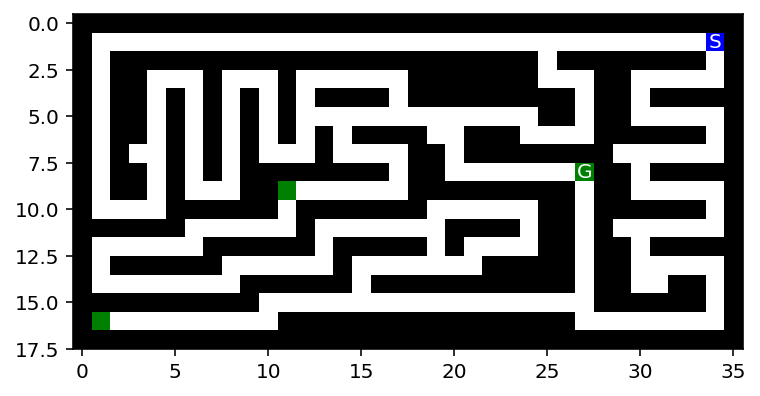

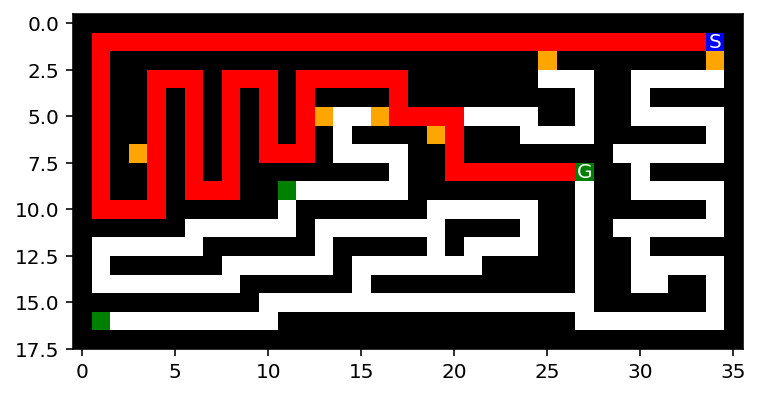

The algorithm took 115 iterations
Path cost:  100
Maximum tree depth:  105
Maximum tree nodes:  45
Maximum size of the frontier:  236


In [204]:
mazes = loadNewMazes()
DFSNewTimes = []
DFSNewCost = []
DFSNewne = []
DFSNewmtd = []
DFSNewmtn = []
DFSNewmfs = []
for m in mazes:
    print(m)
    mh.show_maze(mazes[m])
    node, path_cost, nodes_expanded, max_tree_depth, max_tree_nodes,max_frontier_size = DFS(mazes[m],verbose=False,choosing_method='SWEN',multipleGs=True)
    showPath(mazes[m], node)
    
    DFSNewCost.append(path_cost)
    DFSNewne.append(nodes_expanded)
    DFSNewmtd.append(max_tree_depth)
    DFSNewmtn.append(max_tree_nodes)
    DFSNewmfs.append(max_frontier_size)
    print(f"The algorithm took {nodes_expanded} iterations")
    #print("Solution: ", node.get_path_from_root())
    print("Path cost: ", path_cost)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum tree nodes: ", max_tree_nodes)
    print("Maximum size of the frontier: ", max_frontier_size)

medium_maze


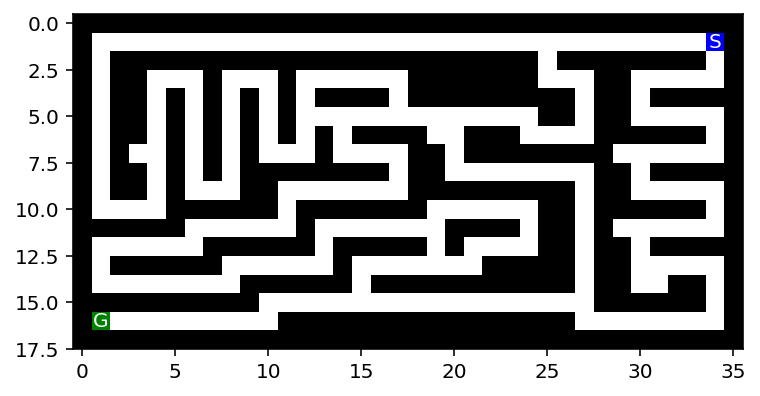

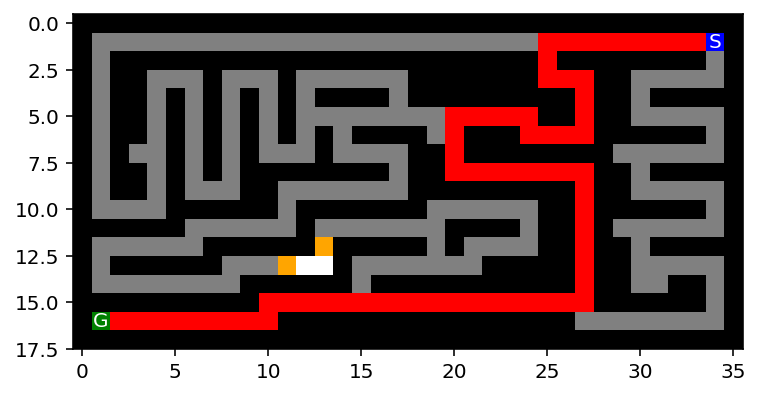

The algorithm took 269 iterations
Path cost:  68
Maximum tree depth:  68
Maximum tree nodes:  272
Maximum size of the frontier:  8
medium_mazeV1


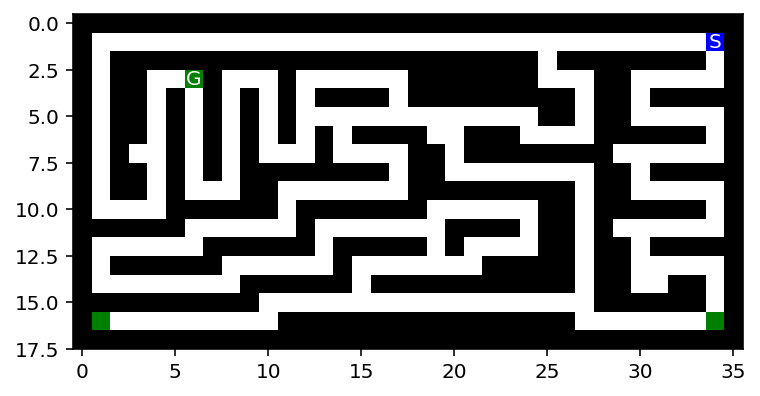

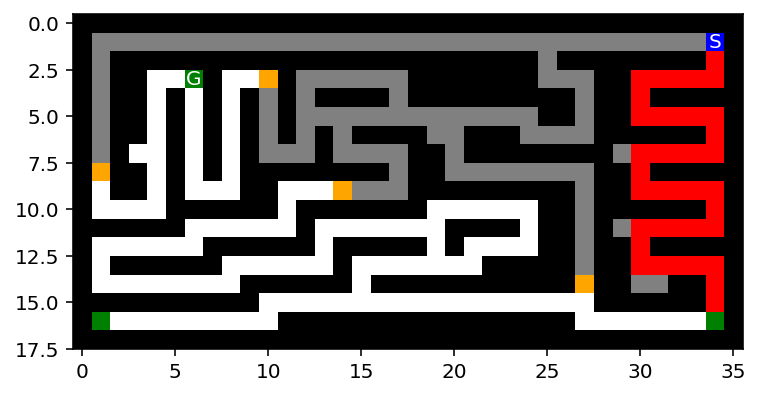

The algorithm took 145 iterations
Path cost:  39
Maximum tree depth:  39
Maximum tree nodes:  150
Maximum size of the frontier:  8
medium_mazeV2


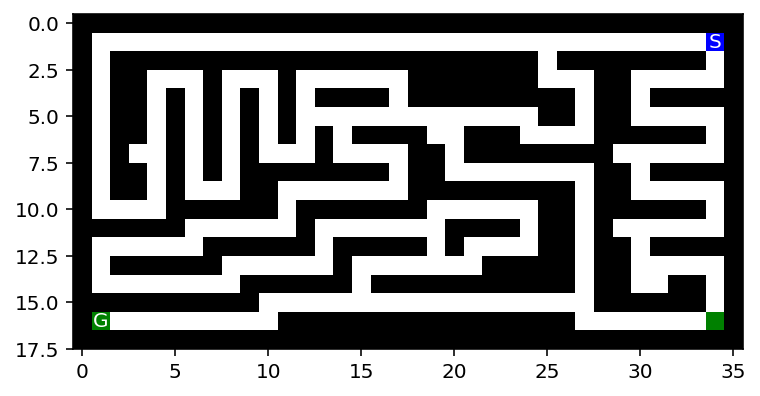

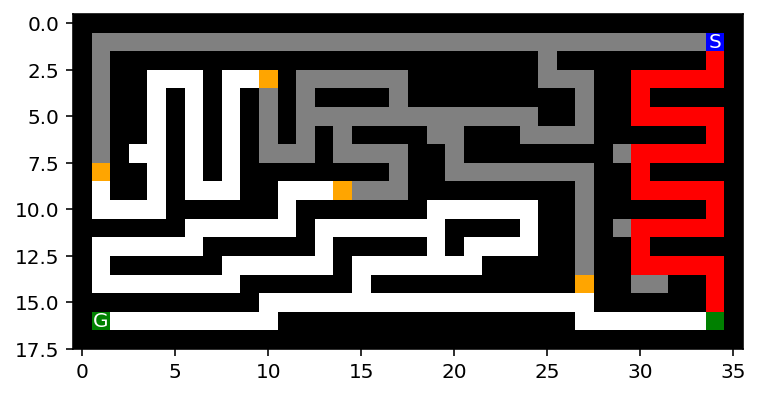

The algorithm took 145 iterations
Path cost:  39
Maximum tree depth:  39
Maximum tree nodes:  150
Maximum size of the frontier:  8
medium_mazeV3


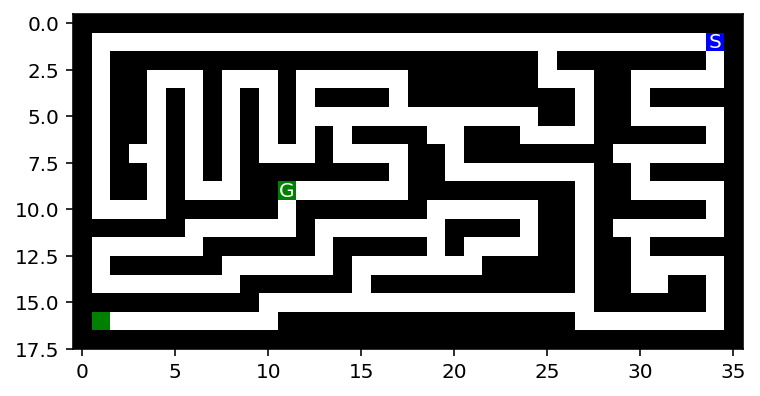

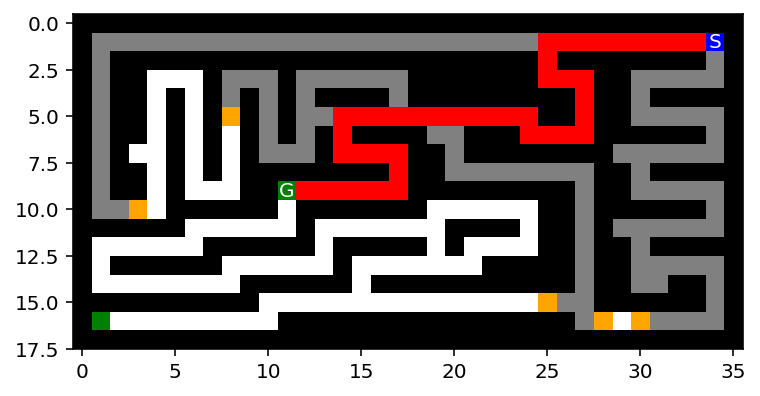

The algorithm took 164 iterations
Path cost:  43
Maximum tree depth:  43
Maximum tree nodes:  170
Maximum size of the frontier:  8
medium_mazeV4


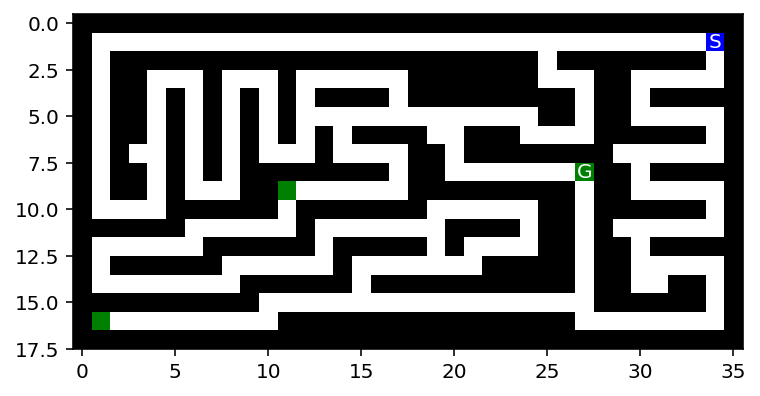

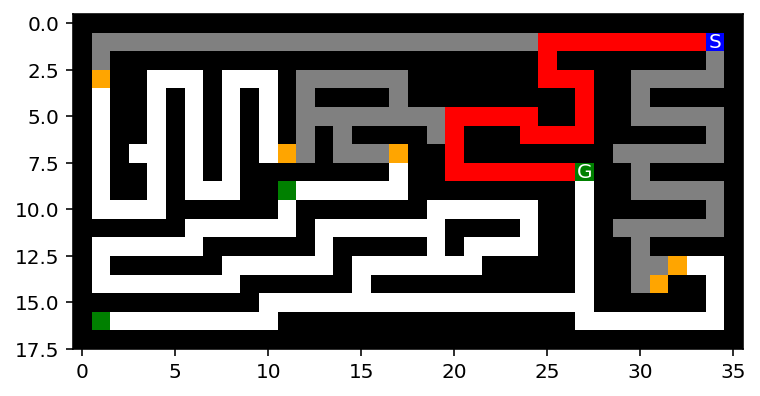

The algorithm took 118 iterations
Path cost:  34
Maximum tree depth:  34
Maximum tree nodes:  124
Maximum size of the frontier:  8


In [194]:
mazes = loadNewMazes()
BFSNewTimes = []
BFSNewCost = []
BFSNewne = []
BFSNewmtd = []
BFSNewmtn = []
BFSNewmfs = []
for m in mazes:
    print(m)
    mh.show_maze(mazes[m])
    node, path_cost, nodes_expanded, max_tree_depth, max_tree_nodes,max_frontier_size = BFS(mazes[m], verbose=False, multipleGs=True)
    #showPath(mazes[m], node)
    BFSNewCost.append(path_cost)
    BFSNewne.append(nodes_expanded)
    BFSNewmtd.append(max_tree_depth)
    BFSNewmtn.append(max_tree_nodes)
    BFSNewmfs.append(max_frontier_size)
    print(f"The algorithm took {nodes_expanded} iterations")
    #print("Solution: ", node.get_path_from_root())
    print("Path cost: ", path_cost)
    print("Maximum tree depth: ", max_tree_depth)
    print("Maximum tree nodes: ", max_tree_nodes)
    print("Maximum size of the frontier: ", max_frontier_size)

In [ ]:
#Code Sample Used from https://www.algorithms-and-technologies.com/iterative_deepening_dfs/python
#Couldn't Complete
def IDFS(maze, verbose, choosing_method='random', multipleGs = False, max_iterations = 10000):
    node_x_y = mh.find_pos(maze, what="S")
    node = DFSNode(pos=node_x_y, parent = None, action = None, cost = 0)
    if multipleGs:
        goal_x_y = findGoals(maze)
    else:
        goal_x_y = mh.find_pos(maze, what="G")
    
    if verbose:
        print(f"Starting state:\t{node_x_y}")
        print(f"Goal State:\t{goal_x_y}")
    
    # root = goal
    if multipleGs:
        if node.pos in goal_x_y:
            return node, 0, 0, 1, 1,0
    else:
        if node.pos == goal_x_y:
            return node, 0, 0, 1, 1,0

    if verbose:
        print(f"Expanding {node}")
        
    iteration = 0
    
    max_depth = 1
    nodes_expanded = 1
    tree_size = 1
    max_tree_size = tree_size
    frontier_size = 1
    max_frontier_size = frontier_size


    depth = 1
    bottom = False
    while not bottom:
        node, node_expanded, max_tree_depth, 
        max_tree_nodes,max_frontier_size, bottom = LimitedDFS(maze, verbose,choosing_method,multipleGs,max_iterations, 
                                                              iteration, max_depth, nodes_expanded, 
                                                              tree_size, max_tree_size, frontier_size, max_frontier_size, 0, depth)
        if node is not None:
            return node, node.cost, nodes_expanded, max_depth,max_tree_size, max_frontier_size
        depth += 1
    return None, -1, nodes_expanded, max_tree_depth, max_tree_size,max_frontier_size


def LimitedDFS(maze, verbose, choosing_method='random', multipleGs = False, max_iterations = 10000, iteration, 
                max_depth, nodes_expanded, tree_size, max_tree_size, frontier_size, max_frontier_size,currentD, max_depth):

    
    # add to frontier
    add_to_fontier(node, maze, choosing_method)
    
    if verbose:
        print(f"Expanded {node}")

        
    done = False
    # loop for search
    while iteration < max_iterations and done == False:
    # go up 1 level
        if len(node.frontier) == 0:
            tree_size -= 1
            parent = node.parent
            node = None
            node = parent

            if verbose:
                print(f" Reached Dead End")
        
        #expand the frontier if hit dead end
        else:
        # get node, LIFO
            node = node.frontier.pop()

            # if at goal state, return    
            if multipleGs:
                if node.pos in goal_x_y:
                    return node, node.cost, nodes_expanded, max_depth,max_tree_size, max_frontier_size, True
            else:
                if node.pos == goal_x_y:
                    return node, node.cost, nodes_expanded, max_depth,max_tree_size, max_frontier_size, True
        
            if currentD == max_depth
            if not is_cyclic(node):
                # if not cyclic, then haven't been here yet
                nodes_expanded += 1
                tree_size += 1
                add_to_fontier(node, maze, choosing_method)
                frontier_size += len(node.frontier)

                if max_frontier_size < frontier_size:
                    max_frontier_size = frontier_size

                if max_tree_size < tree_size:
                    max_tree_size = tree_size

                if verbose:
                    print(f"Expanding {node}")


        iteration = iteration + 1
    return None, bottom

In [205]:
index = 0
sNewMaze = [[BFSNewCost[index], BFSNewne[index], BFSNewmtd[index], BFSNewmtn[index], BFSNewmfs[index]],
            [DFSNewCost[index], DFSNewne[index], DFSNewmtd[index], DFSNewmtn[index], DFSNewmfs[index]]]

sNew = np.array(sNewMaze)
sNewMaze = pd.DataFrame(sNew, columns = ['Path Cost', '# of Nodes Expanded', 
                                         'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
sNewMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS'])
print("Medium Maze")
sNewMaze

Medium Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,68,269,68,272,8
1,DFS,134,289,191,46,591


In [206]:
index = 1
mNewMaze = [[BFSNewCost[index], BFSNewne[index], BFSNewmtd[index], BFSNewmtn[index], BFSNewmfs[index]],
            [DFSNewCost[index], DFSNewne[index], DFSNewmtd[index], DFSNewmtn[index], DFSNewmfs[index]]]

mNew = np.array(mNewMaze)
mNewMaze = pd.DataFrame(mNew, columns = ['Path Cost', '# of Nodes Expanded', 
                                         'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
mNewMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS'])
print("MediumV1 Maze")
mNewMaze

MediumV1 Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,39,145,39,150,8
1,DFS,54,54,54,12,109


In [207]:
index = 2
lNewMaze = [[BFSNewCost[index], BFSNewne[index], BFSNewmtd[index], BFSNewmtn[index], BFSNewmfs[index]],
            [DFSNewCost[index], DFSNewne[index], DFSNewmtd[index], DFSNewmtn[index], DFSNewmfs[index]]]

lNew = np.array(lNewMaze)
lNewMaze = pd.DataFrame(lNew, columns = ['Path Cost', '# of Nodes Expanded', 
                                         'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
lNewMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS'])
print("MediumV2 Maze")
lNewMaze

MediumV2 Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,39,145,39,150,8
1,DFS,134,289,191,46,591


In [208]:
index = 3
eNewMaze = [[BFSNewCost[index], BFSNewne[index], BFSNewmtd[index], BFSNewmtn[index], BFSNewmfs[index]],
            [DFSNewCost[index], DFSNewne[index], DFSNewmtd[index], DFSNewmtn[index], DFSNewmfs[index]]]

eNew = np.array(eNewMaze)
eNewMaze = pd.DataFrame(eNew, columns = ['Path Cost', '# of Nodes Expanded', 
                                         'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
eNewMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS'])
print("MediumV3 Maze")
eNewMaze

MediumV3 Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,43,164,43,170,8
1,DFS,163,191,163,45,392


In [209]:
index = 4
loNewMaze = [[BFSNewCost[index], BFSNewne[index], BFSNewmtd[index], BFSNewmtn[index], BFSNewmfs[index]],
            [DFSNewCost[index], DFSNewne[index], DFSNewmtd[index], DFSNewmtn[index], DFSNewmfs[index]]]

loNew = np.array(loNewMaze)
loNewMaze = pd.DataFrame(loNew, columns = ['Path Cost', '# of Nodes Expanded', 
                                           'Max Tree Depth', 'Max Memory', 'Max Frontier Size'])
loNewMaze.insert(loc = 0, column = 'Algorithm', value = ['BFS', 'DFS'])
print("MediumV4 Maze")
loNewMaze

MediumV4 Maze


,Algorithm,Path Cost,# of Nodes Expanded,Max Tree Depth,Max Memory,Max Frontier Size
0,BFS,34,118,34,124,8
1,DFS,100,115,105,45,236


Text(0.5, 1.0, 'MediumV4 Maze')

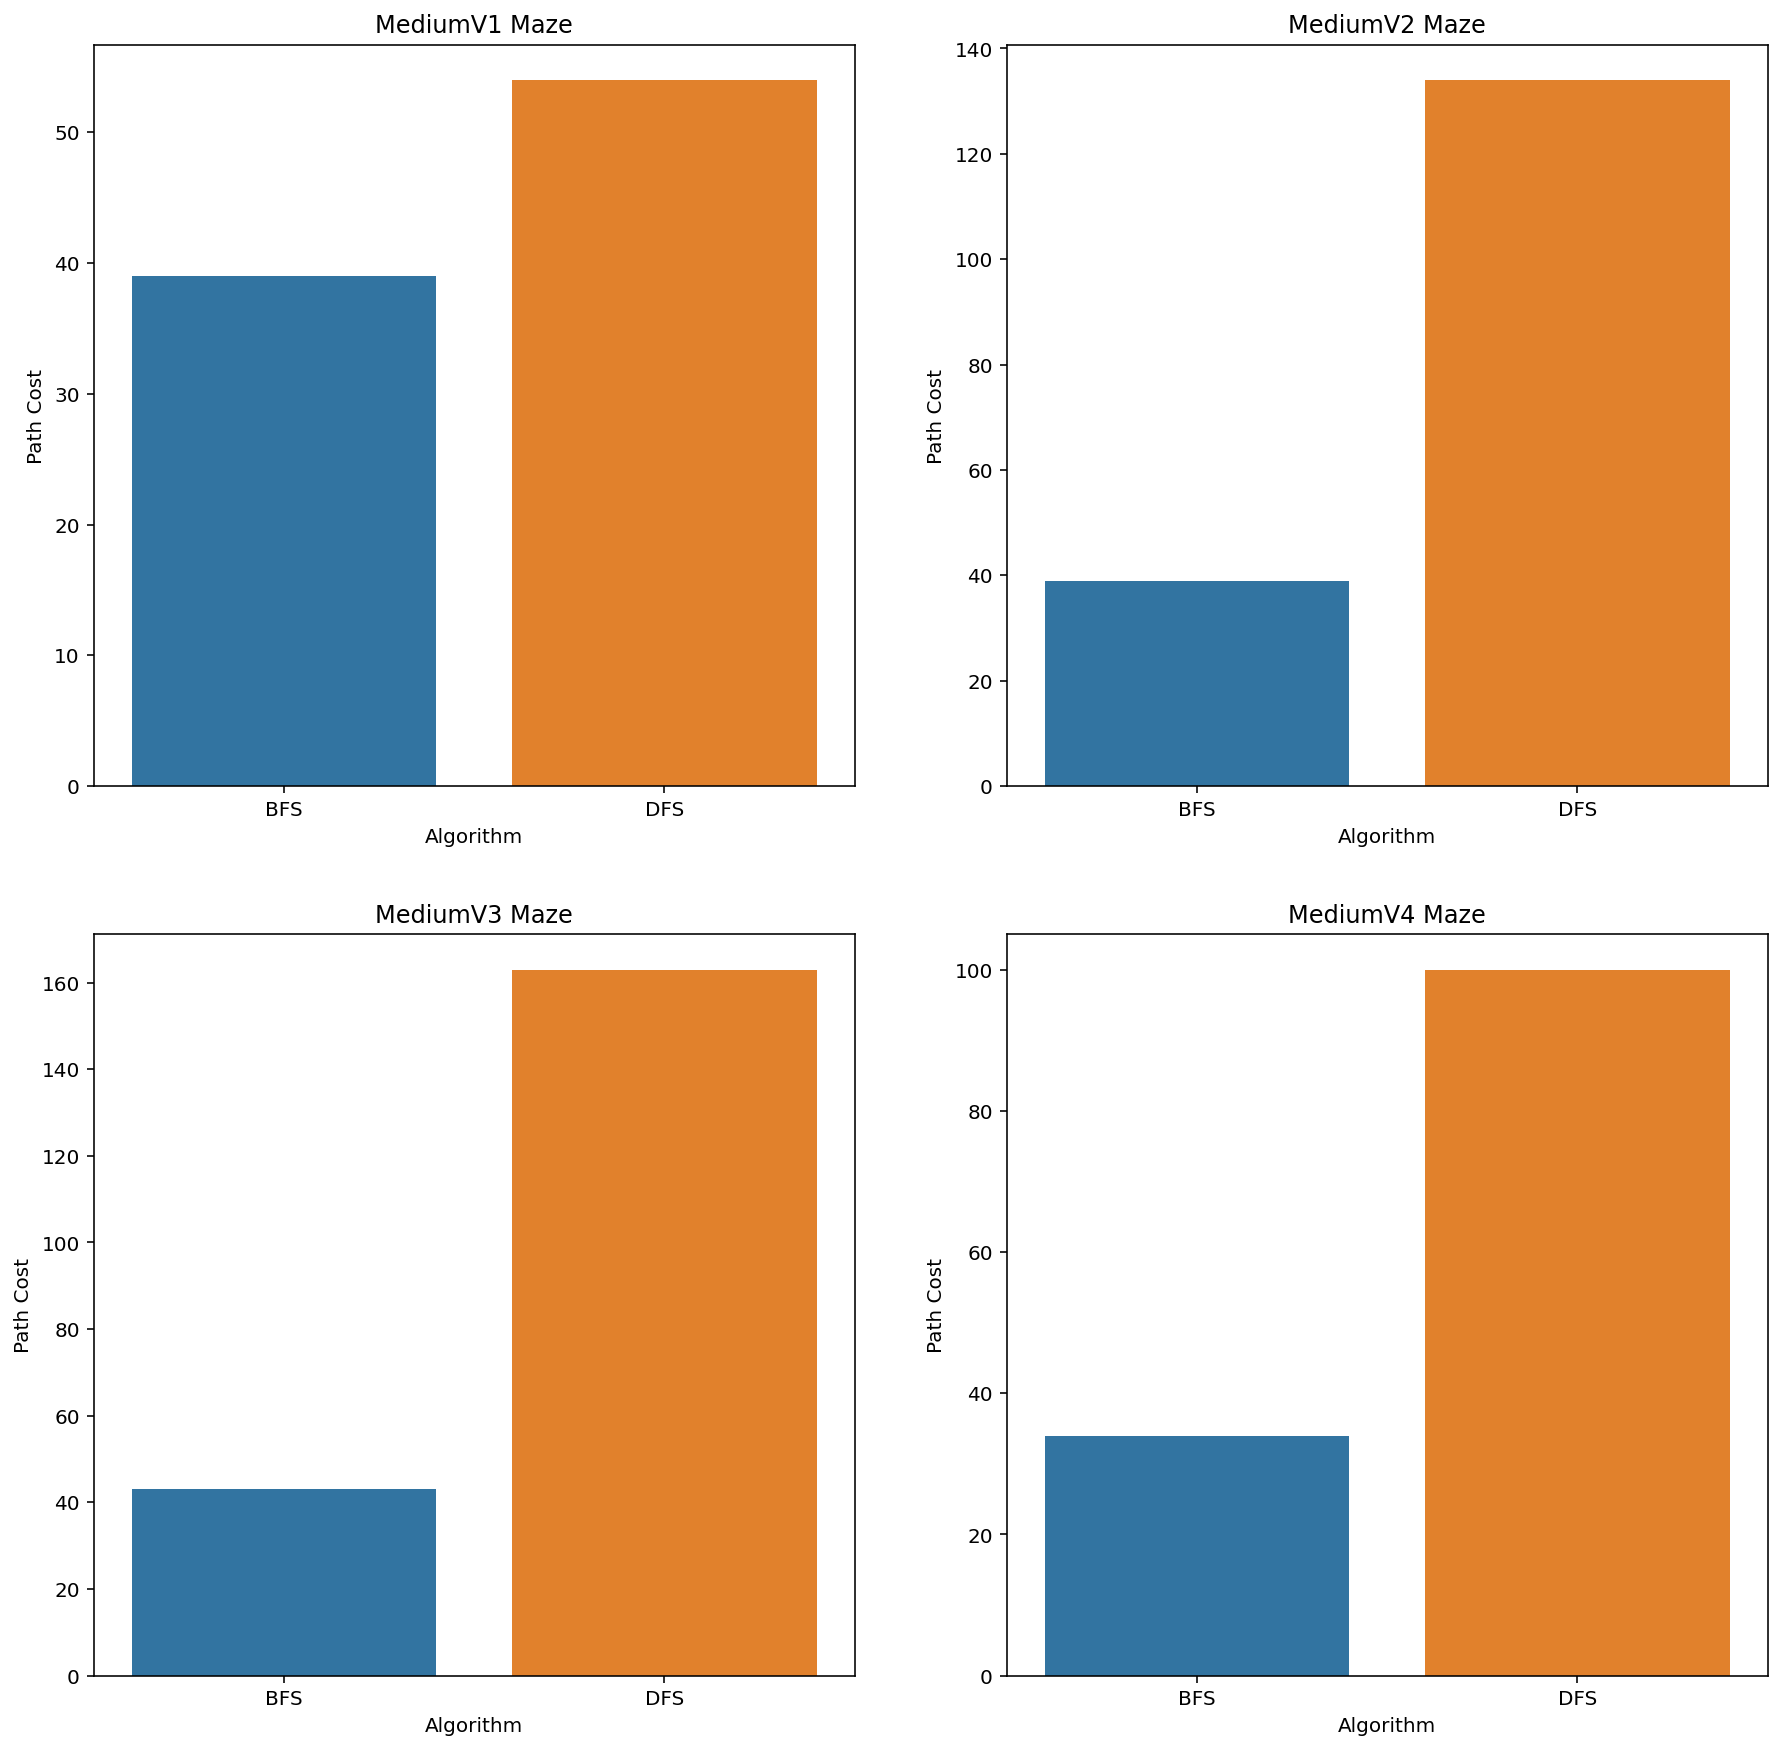

In [210]:
fig, axs = plt.subplots(2,2, figsize=(15,15))
sns.barplot(ax = axs[0][0], x="Algorithm", y="Path Cost", data = mNewMaze)
axs[0][0].set_title("MediumV1 Maze")
sns.barplot(ax = axs[0][1], x="Algorithm", y="Path Cost", data = lNewMaze)
axs[0][1].set_title("MediumV2 Maze")
sns.barplot(ax = axs[1][0], x="Algorithm", y="Path Cost", data = eNewMaze)
axs[1][0].set_title("MediumV3 Maze")
sns.barplot(ax = axs[1][1], x="Algorithm", y="Path Cost", data = loNewMaze)
axs[1][1].set_title("MediumV4 Maze")


Text(0.5, 1.0, 'MediumV4 Maze')

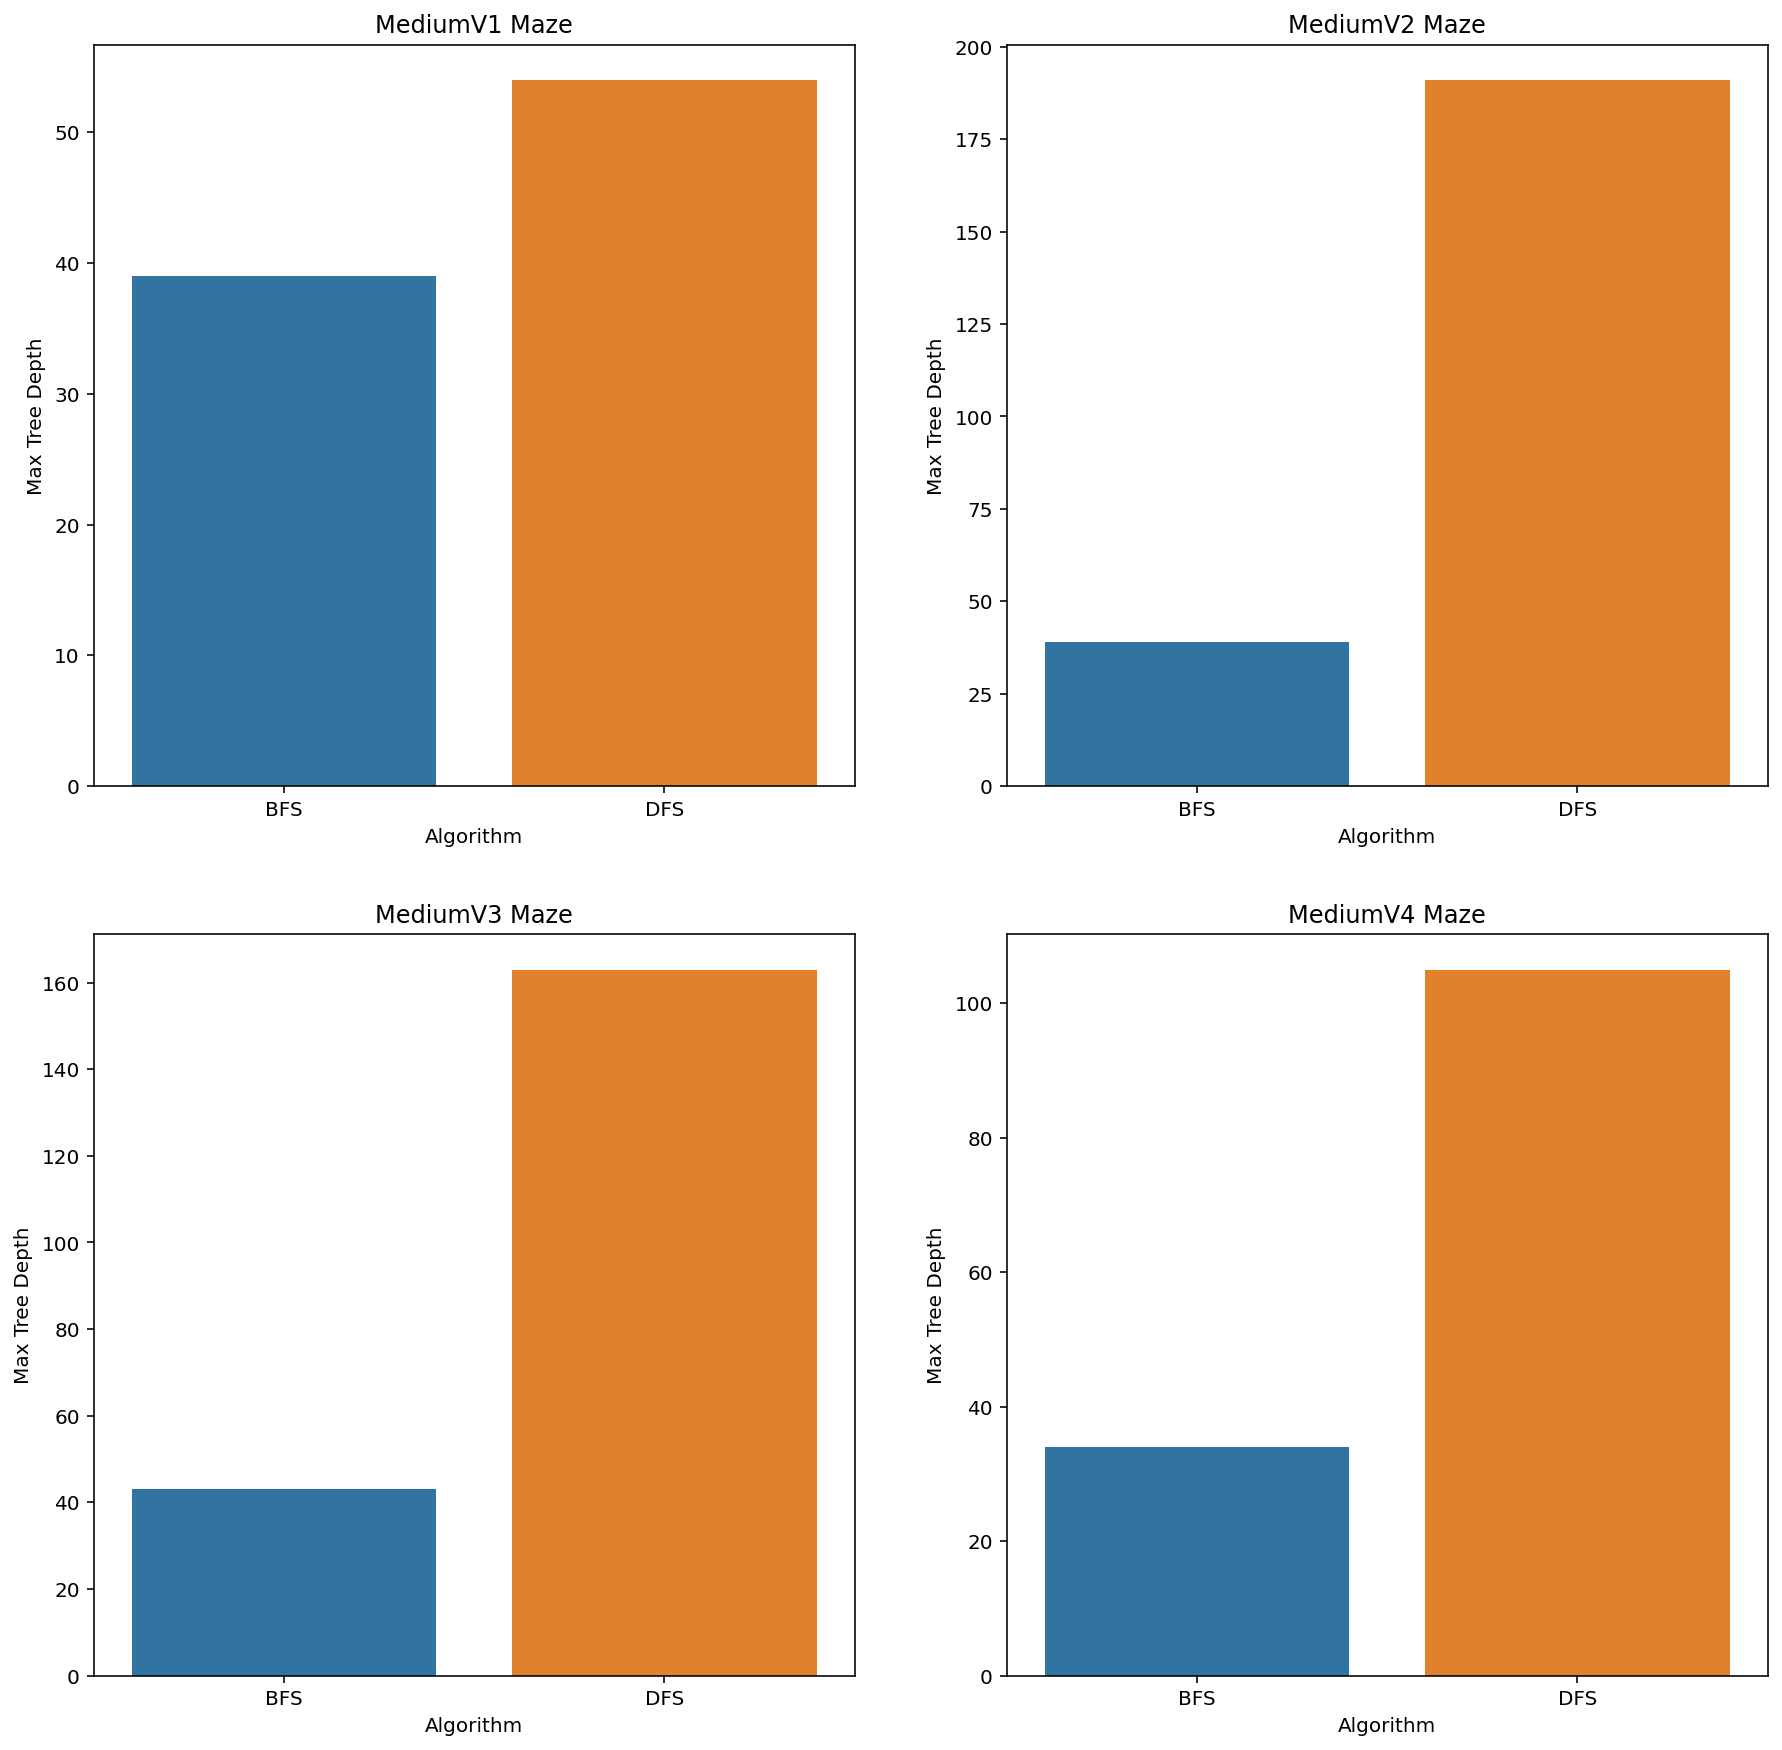

In [211]:
fig, axs = plt.subplots(2,2, figsize=(15,15))
sns.barplot(ax = axs[0][0], x="Algorithm", y="Max Tree Depth", data = mNewMaze)
axs[0][0].set_title("MediumV1 Maze")
sns.barplot(ax = axs[0][1], x="Algorithm", y="Max Tree Depth", data = lNewMaze)
axs[0][1].set_title("MediumV2 Maze")
sns.barplot(ax = axs[1][0], x="Algorithm", y="Max Tree Depth", data = eNewMaze)
axs[1][0].set_title("MediumV3 Maze")
sns.barplot(ax = axs[1][1], x="Algorithm", y="Max Tree Depth", data = loNewMaze)
axs[1][1].set_title("MediumV4 Maze")

Text(0.5, 1.0, 'MediumV4 Maze')

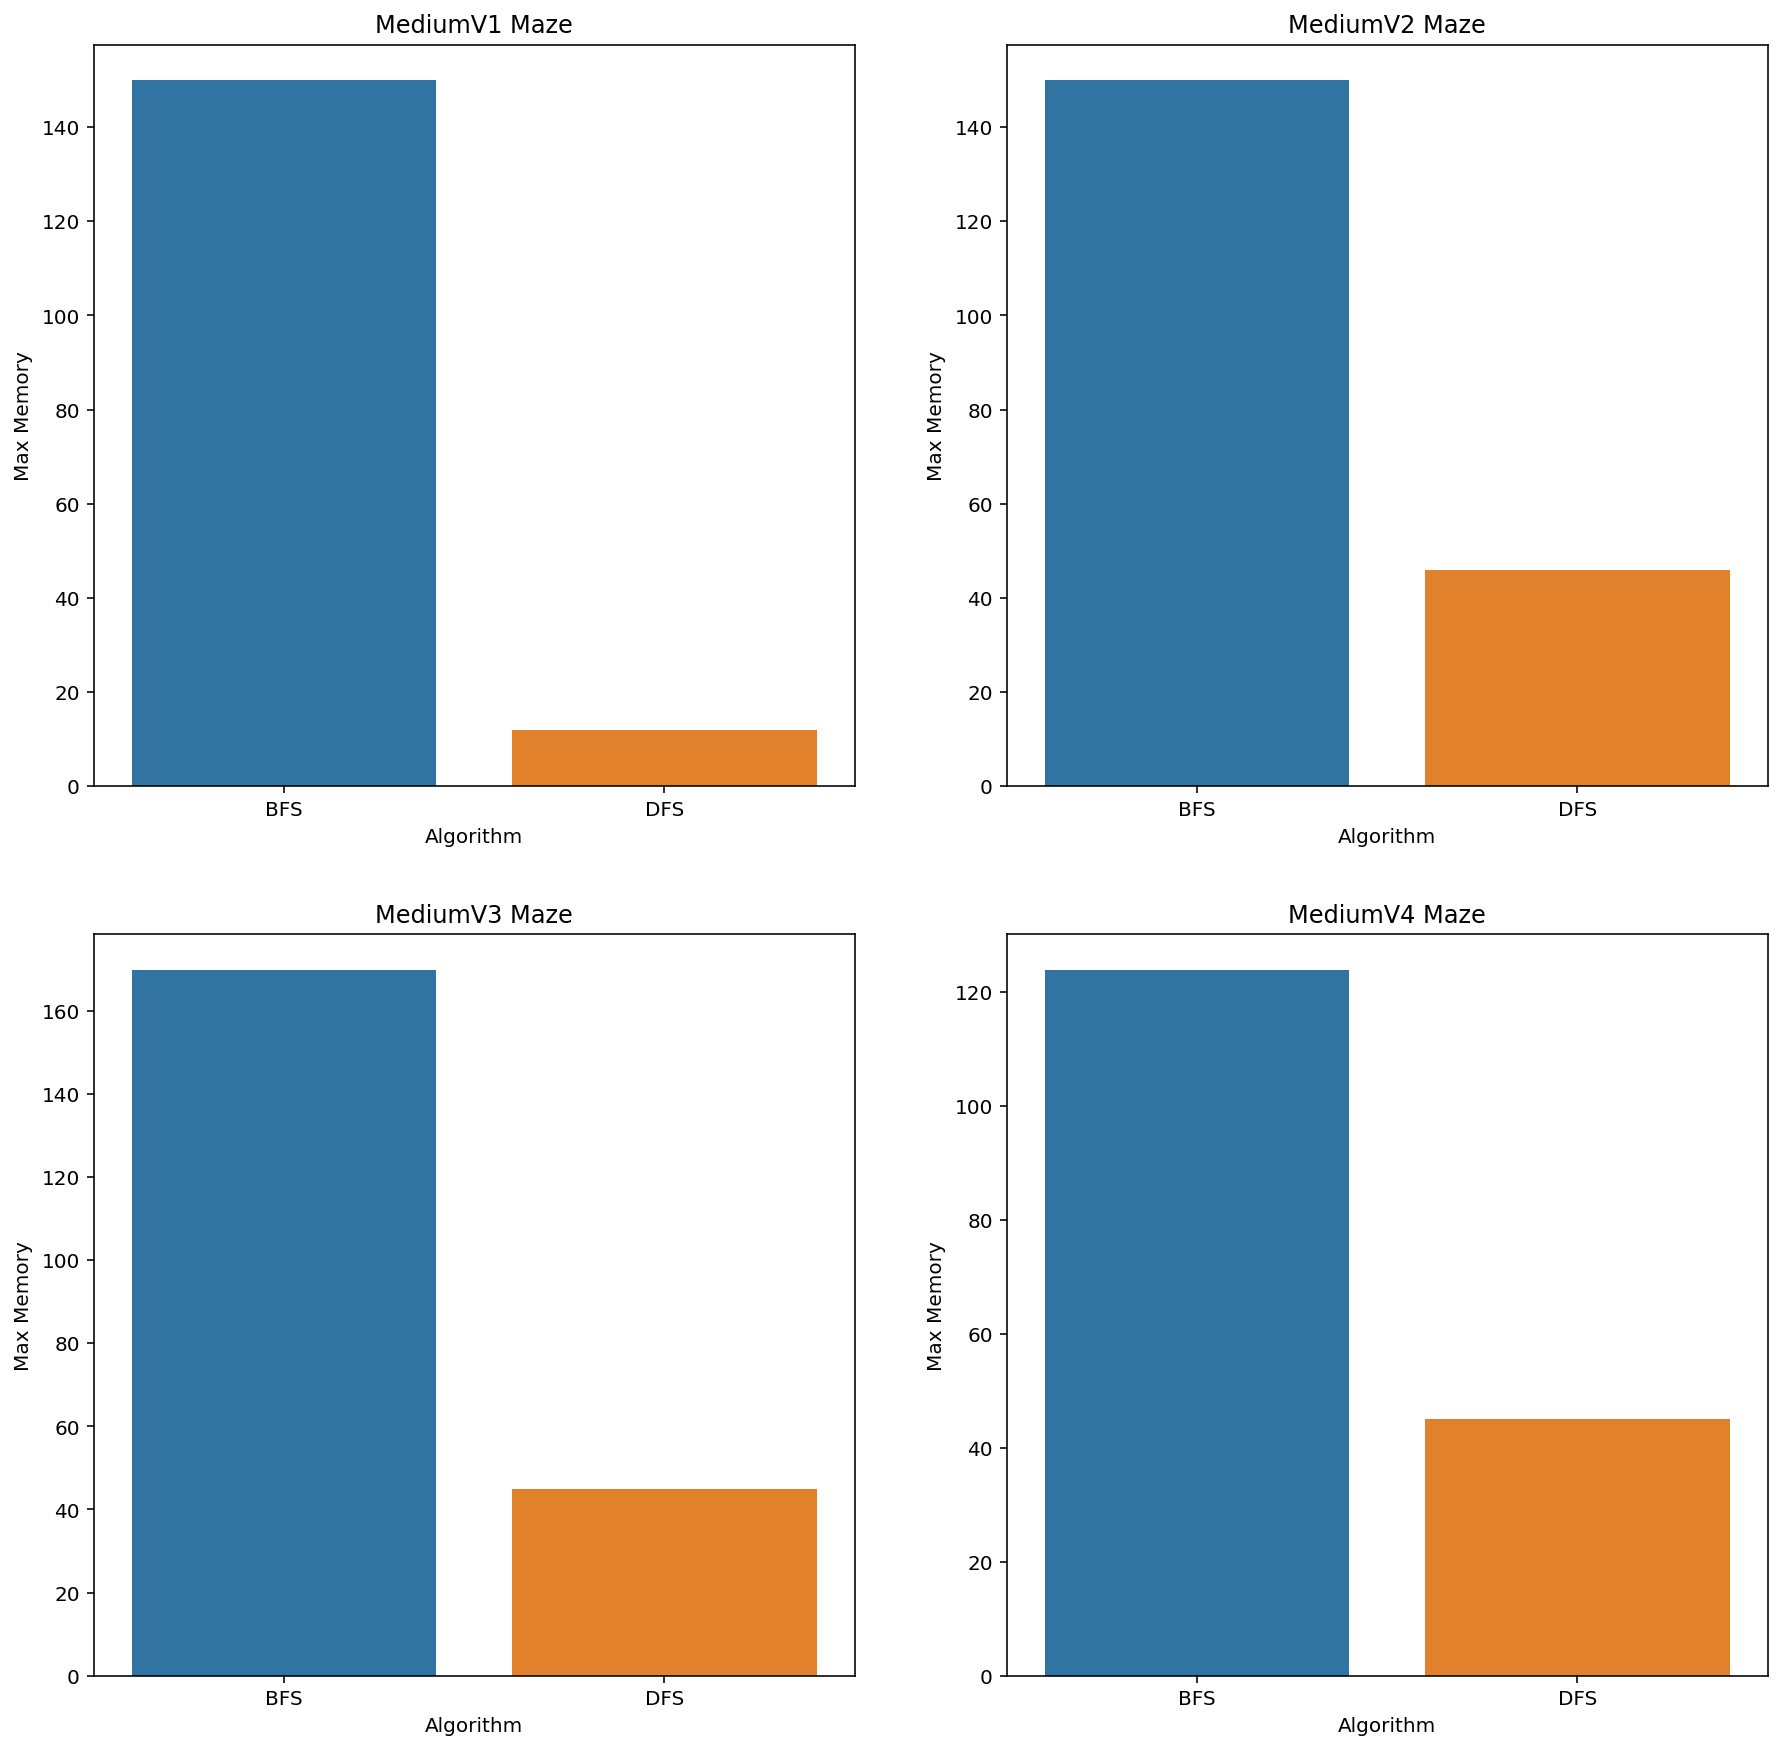

In [212]:
fig, axs = plt.subplots(2,2, figsize=(15,15))
sns.barplot(ax = axs[0][0], x="Algorithm", y="Max Memory", data = mNewMaze)
axs[0][0].set_title("MediumV1 Maze")
sns.barplot(ax = axs[0][1], x="Algorithm", y="Max Memory", data = lNewMaze)
axs[0][1].set_title("MediumV2 Maze")
sns.barplot(ax = axs[1][0], x="Algorithm", y="Max Memory", data = eNewMaze)
axs[1][0].set_title("MediumV3 Maze")
sns.barplot(ax = axs[1][1], x="Algorithm", y="Max Memory", data = loNewMaze)
axs[1][1].set_title("MediumV4 Maze")

# Graduate Answer

* When determining the effect of multiple goals in the maze, the algorithm for breadth first search continues to preform better than depth first search. The BFS always found the closest goal. The DFS failed to find the closes goal if the first found goal is in the southern path of the maze. This is due to the assumption that the goal is alwas south of the starting position. However, for the mazes when the goals is in the south east corner the DFS works much faster and requires less memory. In addition BFS uses less memory than before because much less nodes have to be traversed to find the goal.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [18]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [19]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [20]:
# Your code/answer goes here